# Data analysis

In [1]:
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path

Data dir containing all files

In [2]:
!ls -la /home/ashinde/PhD/CaffineBravery/

total 48
drwxr-xr-x 20 ashinde ashinde 4096 Feb  2 17:23 .
drwxrwxr-x  6 ashinde ashinde   84 Dec  7 19:05 ..
drwxr-xr-x  7 ashinde ashinde  124 Nov 15 11:34 app
drwxr-xr-x  4 ashinde ashinde  142 Oct 15 15:33 domains
drwxr-xr-x  8 ashinde ashinde  220 Feb  7 18:15 .git
-rw-r--r--  1 ashinde ashinde  154 May 24  2022 .gitattributes
-rw-r--r--  1 ashinde ashinde  129 May 24  2022 .gitignore
drwxrwxr-x  6 ashinde ashinde   73 Jun  7  2022 .gradle
drwxr-xr-x  3 ashinde ashinde   21 May 24  2022 gradle
-rwxr-xr-x  1 ashinde ashinde 5774 May 24  2022 gradlew
-rw-r--r--  1 ashinde ashinde 2763 May 24  2022 gradlew.bat
drwxrwxr-x  2 ashinde ashinde   52 Jul 19  2022 policies
-rw-rw-r--  1 ashinde ashinde  743 Jun  7  2022 .project
drwxrwxr-x  2 ashinde ashinde   62 Nov 29 12:57 results
drwxrwxr-x  2 ashinde ashinde  101 Feb  1 18:21 results_l1_active
drwxrwxr-x  2 ashinde ashinde   63 Feb  2 14:29 results_l1_active_control
drwxrwxr-x  2 ashinde ashinde  100 Nov 29 21:44 results_l1_active_crit

In [3]:
# Data files
data_dir = Path("/home/ashinde/PhD/CaffineBravery/results_l2_control/")
data_files = list(data_dir.iterdir())

graph_files = list(filter(lambda x: "pol_graph" in str(x), data_files))
print(f"Policy graph files: {graph_files}")

trace_file = list(filter(lambda x: "trace" in str(x), data_files))[0]
print(f"Trace file: {trace_file}")

Policy graph files: [PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1175631958_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/2036775591_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1019484860_defl1_active_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/3565780_defl1_passive_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1424108509_attl2_pol_graph.json')]
Trace file: /home/ashinde/PhD/CaffineBravery/results_l2_control/trace.json


In [4]:
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

In [5]:
# Draw policy graphs
def to_networkx_graph(json_data):

    nodes = json_data["nodes"]
    edges = json_data["edges"]

    G = networkx.MultiDiGraph()
    labels = {}
    edge_labels = {}
    edge_print = {}

    for k, v in nodes.items():
        
        if "start" in v.keys():
            labels[k] = f"start_{v['act']}"
        else:
            labels[k] = v["act"]
        G.add_node(k)
        
    for n, e in edges.items():
        for l, _n in e.items():
            G.add_edge(n, _n, label=l)
            
            e_data = G.get_edge_data(n, _n)
            label = [l["label"] for l in e_data.values()]
            # print(label)
            edge_labels[(n, _n)] = list(e_data.keys())

    # pos = networkx.shell_layout(G, scale=1)
    # networkx.draw_networkx_labels(G, pos, labels)
    
    print(G)
    pos = networkx.nx_pydot.graphviz_layout(G, prog="neato")
    networkx.draw(G, pos, labels=labels, with_labels=True, font_size=8, alpha=0.5, width=0.2)
    plotter.show()

---
## Plot policy graphs

/home/ashinde/PhD/CaffineBravery/results_l2_control/1175631958_attl0_pol_graph.json
MultiDiGraph with 13 nodes and 80 edges


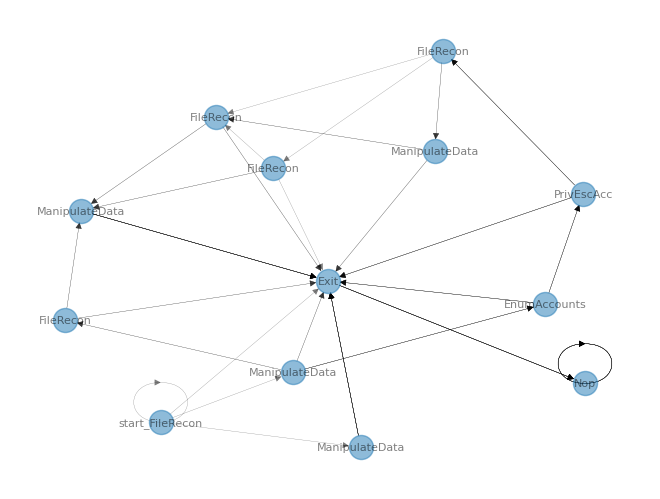

/home/ashinde/PhD/CaffineBravery/results_l2_control/2036775591_attl0_pol_graph.json
MultiDiGraph with 16 nodes and 96 edges


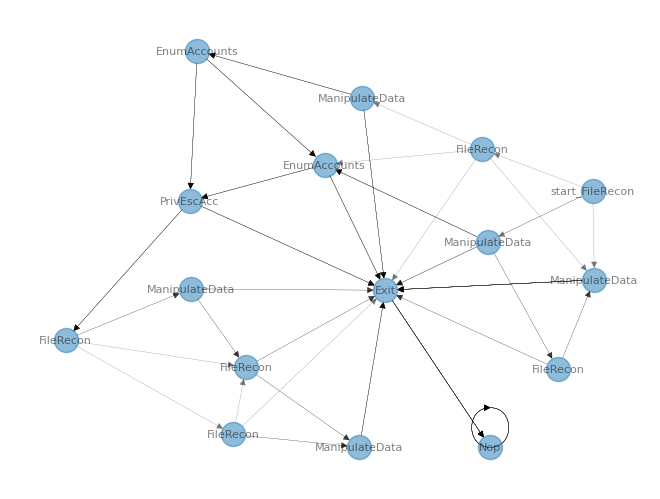

/home/ashinde/PhD/CaffineBravery/results_l2_control/1019484860_defl1_active_pol_graph.json
MultiDiGraph with 1 nodes and 4 edges


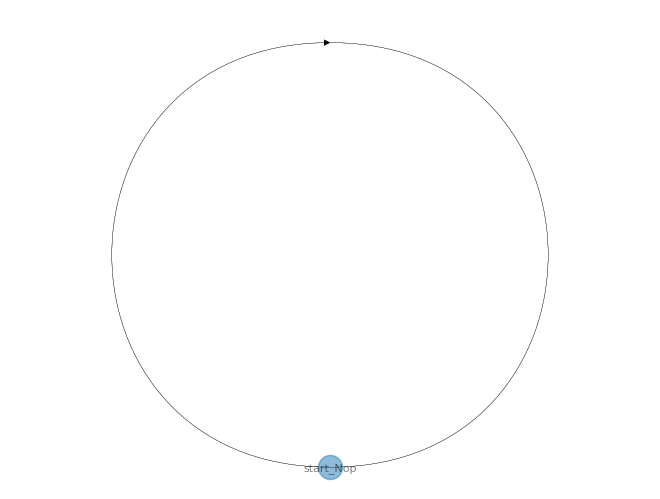

/home/ashinde/PhD/CaffineBravery/results_l2_control/3565780_defl1_passive_pol_graph.json
MultiDiGraph with 5 nodes and 20 edges


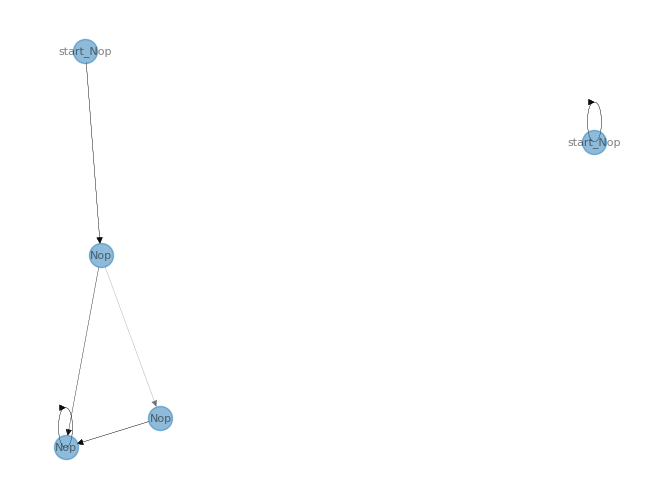

/home/ashinde/PhD/CaffineBravery/results_l2_control/1424108509_attl2_pol_graph.json
MultiDiGraph with 13 nodes and 76 edges


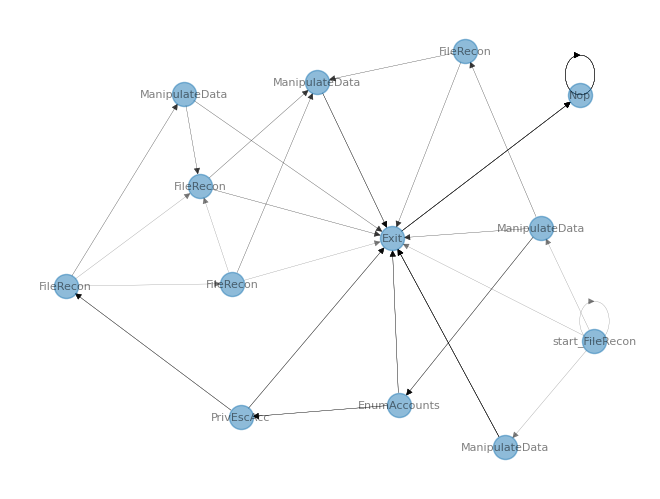

In [6]:
for g in graph_files:
    print(g)
    data = load_json(g)
    to_networkx_graph(data)

---
## Beliefs 

In [7]:
import summarize_interaction

# load json data
data = load_json(trace_file)

keys, b_traces = summarize_interaction.get_all_belief_traces(data)

print("Plotting belief divergence over")
for k in keys:
    print(k)

Plotting belief divergence over
('HostType', ['critical', 'critical_honeypot', 'honeypot'])
('HostHasData', ['no', 'yes'])
('DataPrivs', ['root', 'user'])
('EscAccounts', ['no', 'yes'])
('AccFound', ['no', 'yes'])
('DataFound', ['no', 'yes'])
('AccessLevel', ['root', 'user'])
('AttActive', ['no', 'yes'])
('DataInjected', ['no', 'yes'])


Plotting for ('HostType', ['critical', 'critical_honeypot', 'honeypot'])


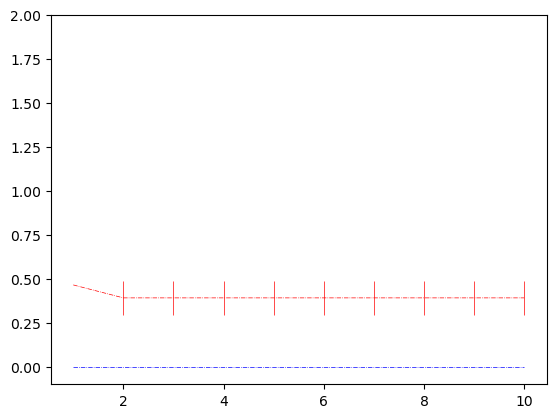

Plotting for ('HostHasData', ['no', 'yes'])


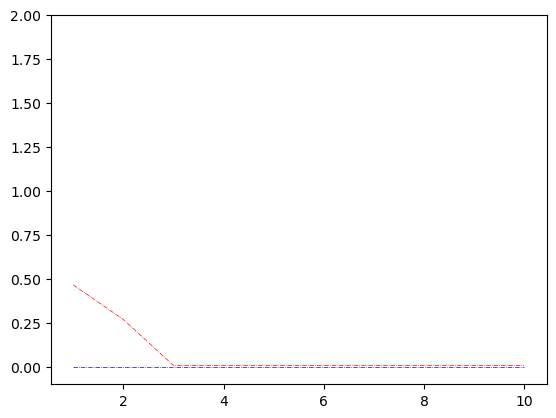

Plotting for ('DataPrivs', ['root', 'user'])


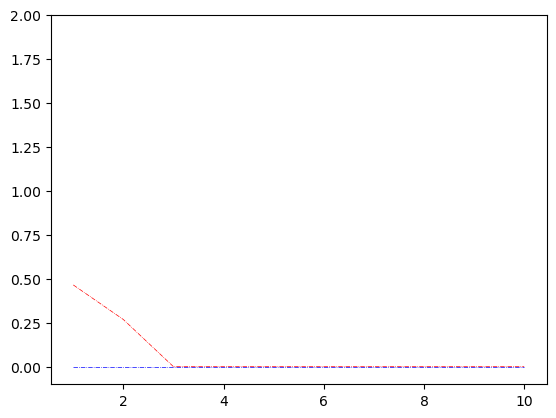

Plotting for ('EscAccounts', ['no', 'yes'])


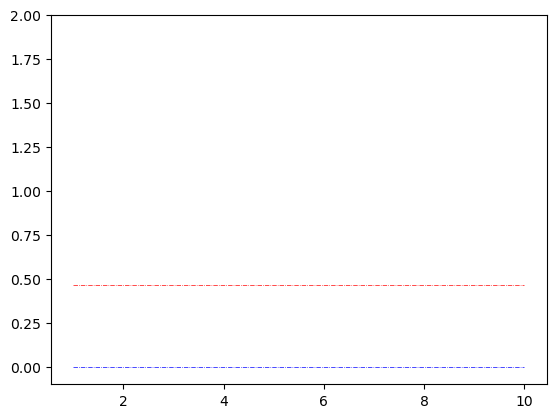

Plotting for ('AccFound', ['no', 'yes'])


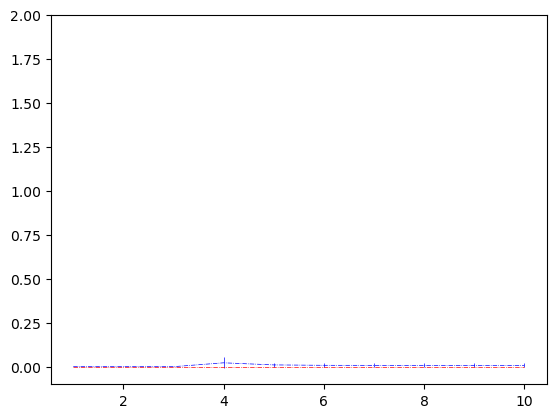

Plotting for ('DataFound', ['no', 'yes'])


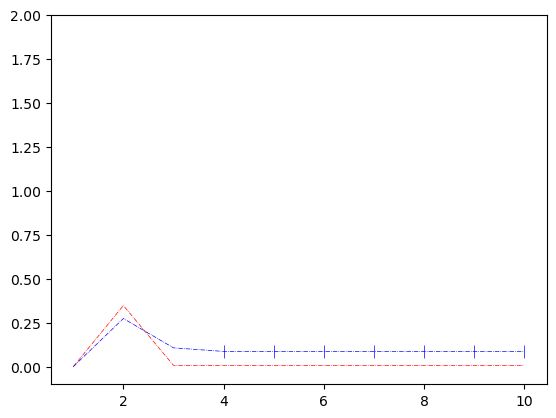

Plotting for ('AccessLevel', ['root', 'user'])


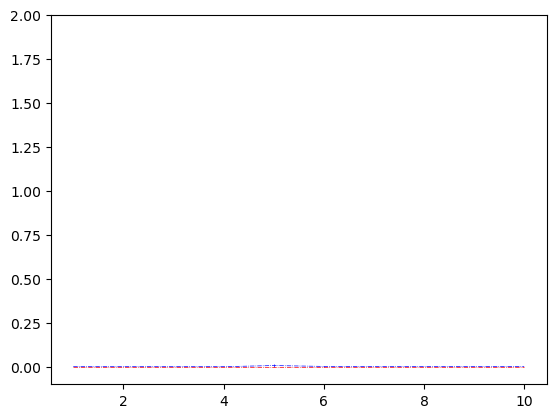

Plotting for ('AttActive', ['no', 'yes'])


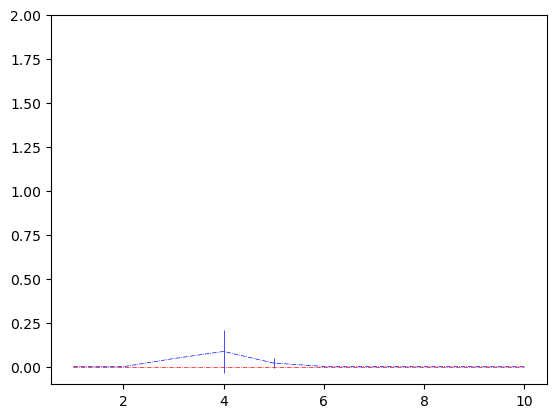

Plotting for ('DataInjected', ['no', 'yes'])


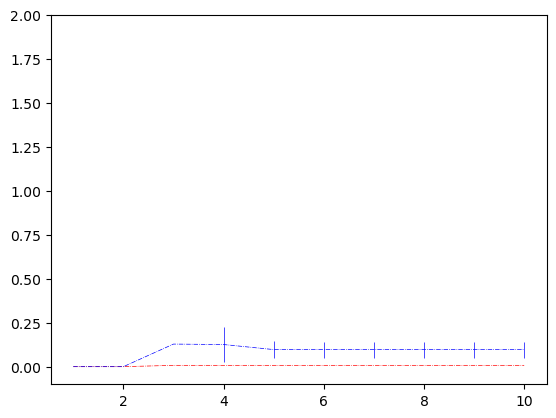

In [8]:
# Get divergence
divs = []
for b_trace in b_traces:
    divs.append(summarize_interaction.get_divergence(b_trace))
    
for i in range(len(keys)):
    print(f"Plotting for {keys[i]}")
    
    i_means = numpy.mean(divs[i][0], axis=0)
    i_dev = numpy.std(divs[i][0], axis=0)
    plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)
    
    if len(divs[i]) > 1:
        j_means = numpy.mean(divs[i][1], axis=0)
        j_dev = numpy.std(divs[i][1], axis=0)
        plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
        # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)
    
    plotter.ylim(-0.1, 2)
    plotter.show()
    

---
# Display interaction examples

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,FileRecon,denied|none|success|active|none,Nop,login_activity
1,ManipulateData,auth|user_files|success|active|none,Nop,file_write
2,Exit,denied|none|success|terminated|none,Nop,none
3,Nop,auth|none|success|terminated|none,Nop,none
4,Nop,denied|none|success|terminated|none,Nop,none
5,Nop,denied|none|failure|terminated|none,Nop,none
6,Nop,auth|user_files|success|terminated|none,Nop,none
7,Nop,denied|user_files|failure|terminated|none,Nop,none
8,Nop,denied|user_files|failure|terminated|none,Nop,none
9,Nop,denied|user_files|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,7.800001e-02,1.820000e-01,7.400000e-01,0.000000,0.000000
2,0.002091,9.614624e-01,1.918458e-02,1.118692e-02,0.006075,0.000000
3,0.000000,1.007965e-03,0.000000e+00,8.678907e-04,0.998030,0.000094
4,0.000000,5.124807e-05,5.379174e-06,0.000000e+00,0.999943,0.000000
5,0.000000,0.000000e+00,6.157557e-08,2.548480e-07,1.000000,0.000000
6,0.000000,1.510278e-08,5.674312e-10,2.942944e-09,1.000000,0.000000
7,0.000000,1.801660e-10,0.000000e+00,2.632668e-11,1.000000,0.000000
8,0.000000,1.548628e-12,0.000000e+00,0.000000e+00,1.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


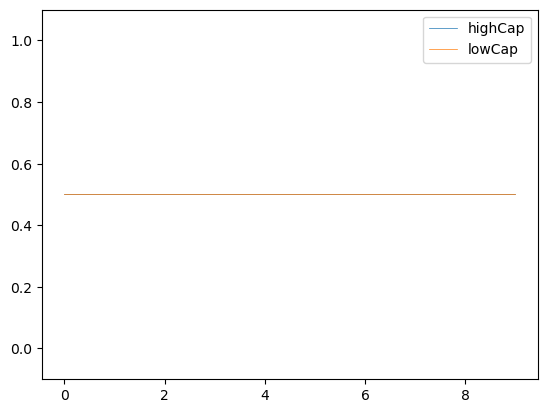

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


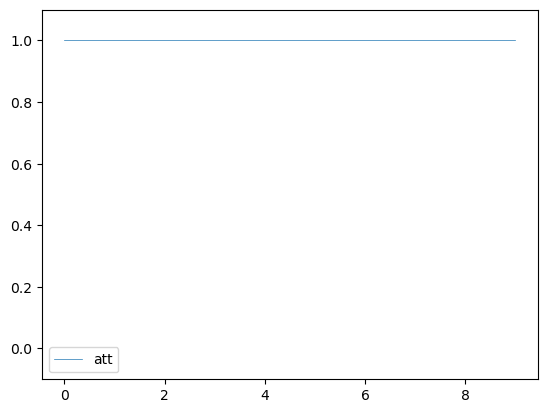

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


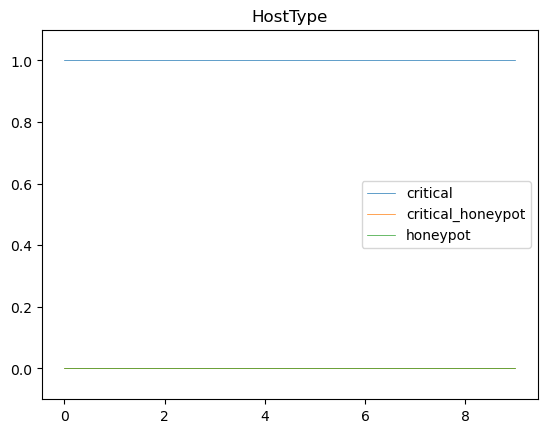

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,0.3,0.0,0.7
2,0.3,0.0,0.7
3,0.3,0.0,0.7
4,0.3,0.0,0.7
5,0.3,0.0,0.7
6,0.3,0.0,0.7
7,0.3,0.0,0.7
8,0.3,0.0,0.7
9,0.3,0.0,0.7


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


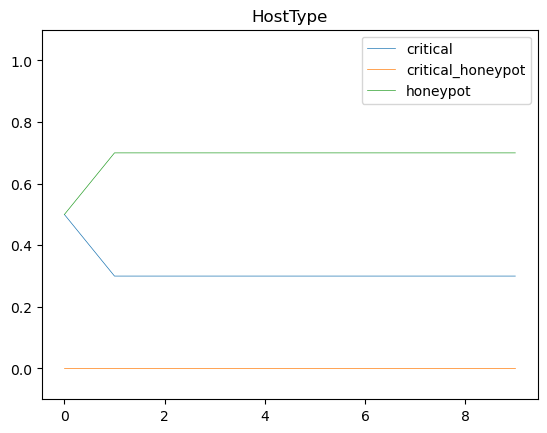

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


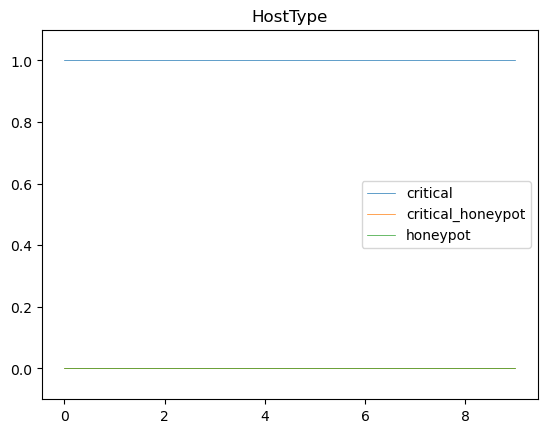

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


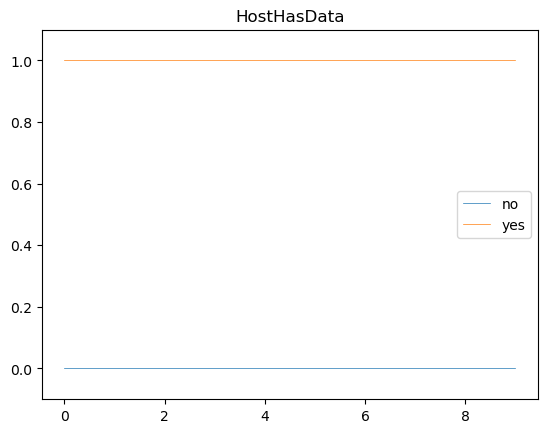

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000139,0.999861
3,0.000139,0.999861
4,0.000139,0.999861
5,0.000139,0.999861
6,0.000139,0.999861
7,0.000139,0.999861
8,0.000139,0.999861
9,0.000139,0.999861


Plotting ('HostHasData', ['no', 'yes']) for agent_i


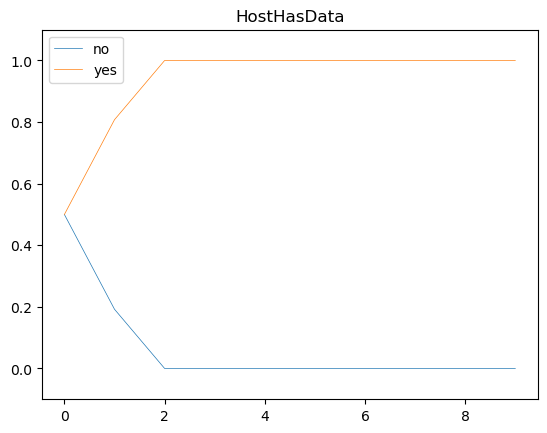

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


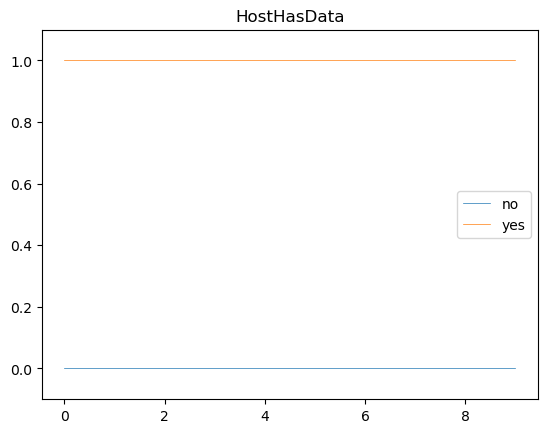

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for state:


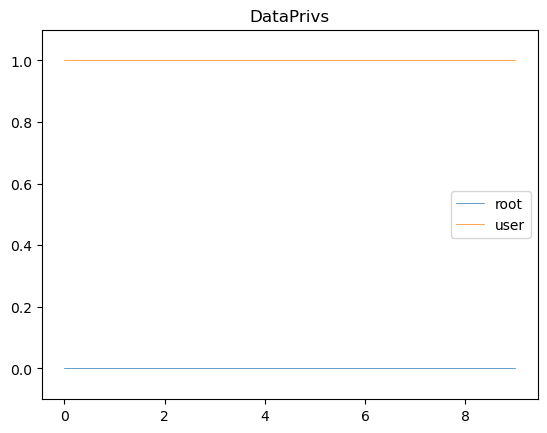

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('DataPrivs', ['root', 'user']) for agent_i


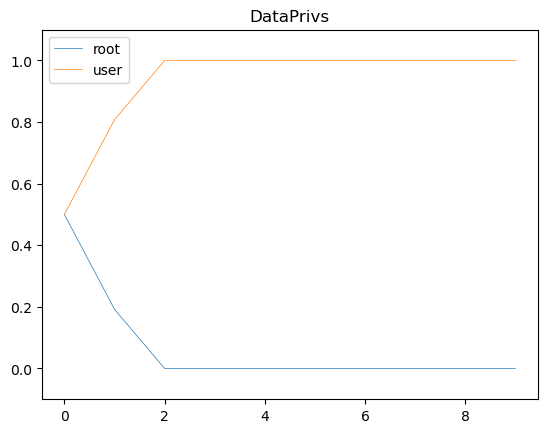

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


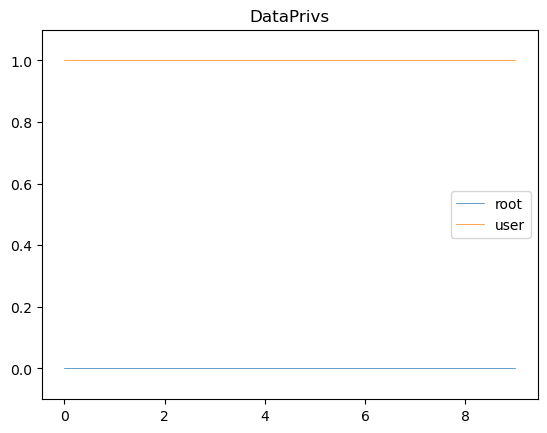

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


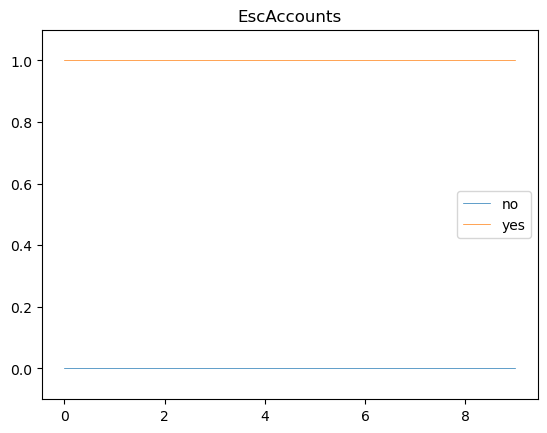

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


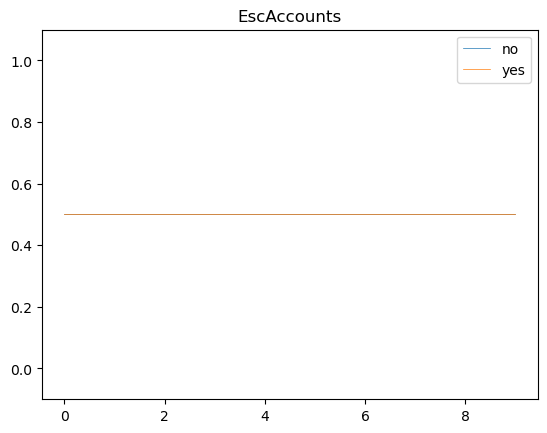

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


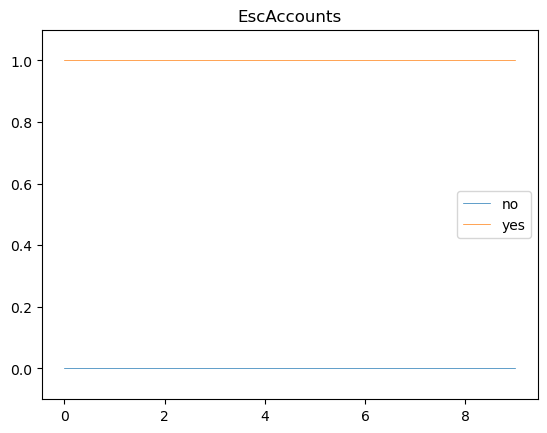

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for state:


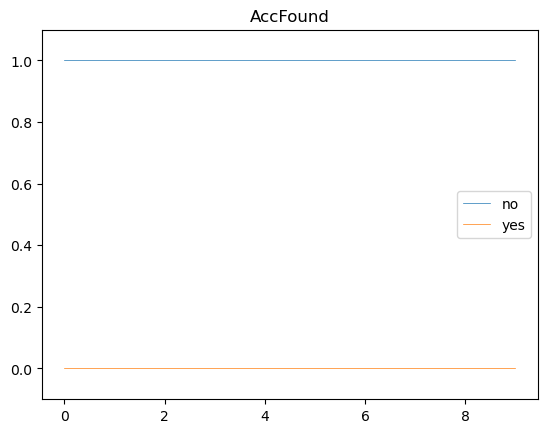

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for agent_i


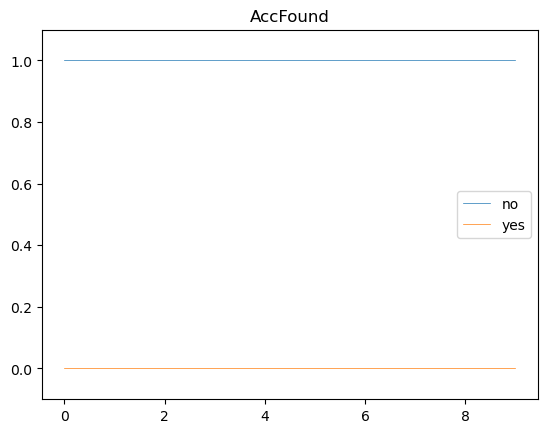

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.999899,0.000102
4,0.999985,0.000016
5,0.999989,0.000010
6,0.999990,0.000010
7,0.999990,0.000010
8,0.999990,0.000010
9,0.999990,0.000010


Plotting ('AccFound', ['no', 'yes']) for agent_j


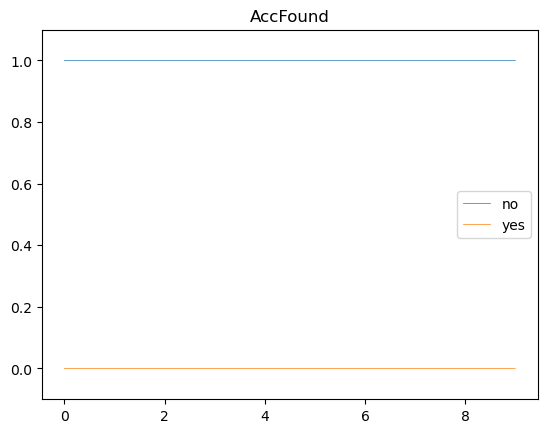

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


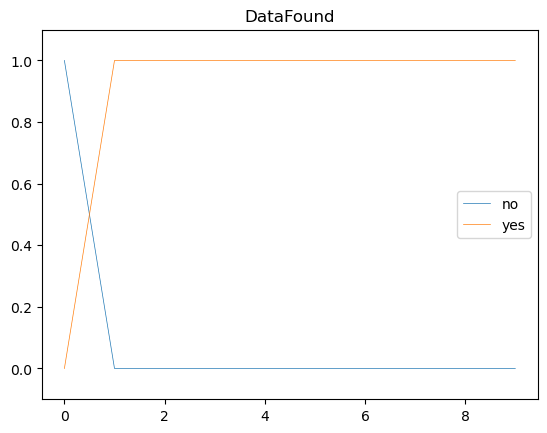

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.307692,0.692308
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataFound', ['no', 'yes']) for agent_i


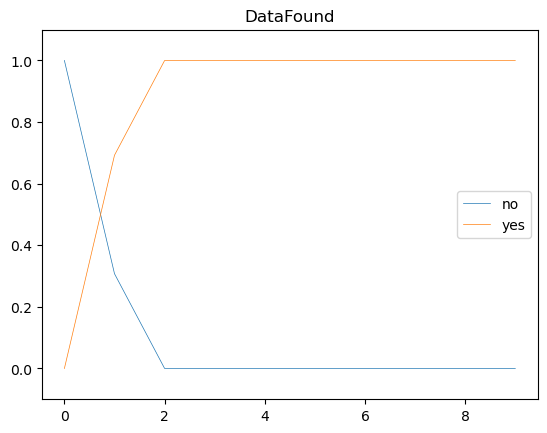

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.032648,0.967352
3,0.013410,0.986590
4,0.013348,0.986652
5,0.013345,0.986654
6,0.013345,0.986655
7,0.013345,0.986655
8,0.013345,0.986655
9,0.013345,0.986655


Plotting ('DataFound', ['no', 'yes']) for agent_j


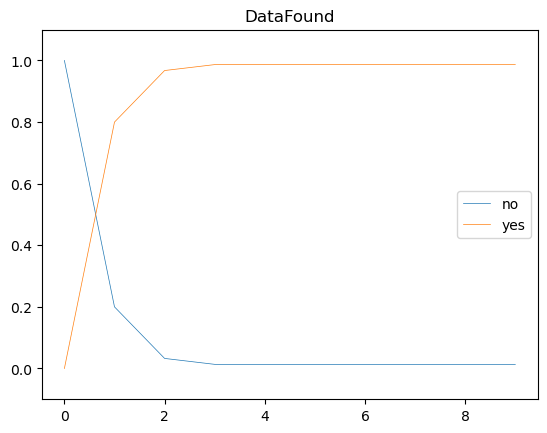

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for state:


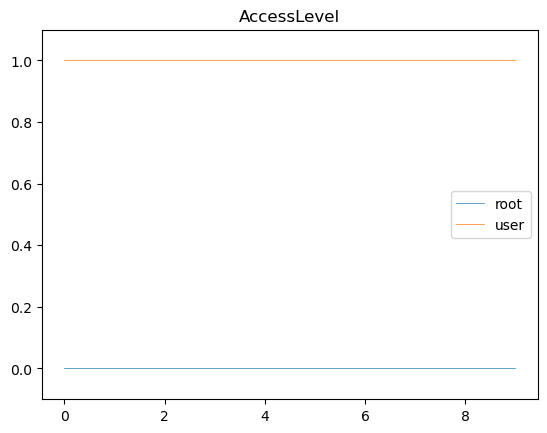

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


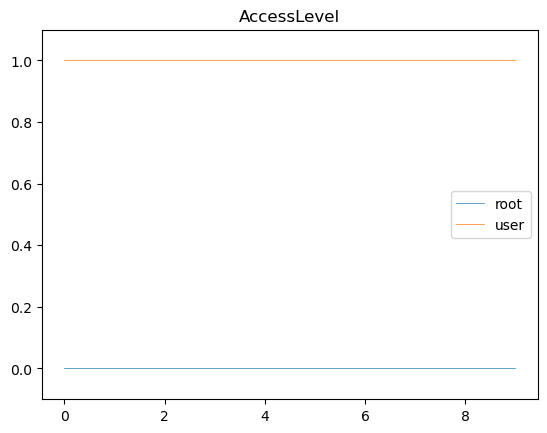

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000e+00,1.000000
1,0.000000e+00,1.000000
2,0.000000e+00,1.000000
3,0.000000e+00,1.000000
4,5.379174e-06,0.999995
5,3.164236e-07,1.000000
6,1.861315e-08,1.000000
7,1.530927e-08,1.000000
8,1.528449e-08,1.000000
9,1.528449e-08,1.000000


Plotting ('AccessLevel', ['root', 'user']) for agent_j


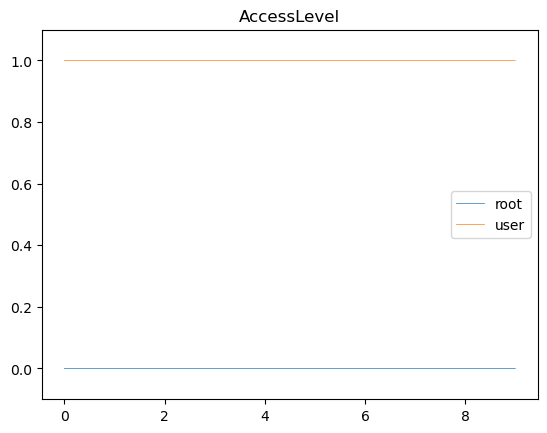

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


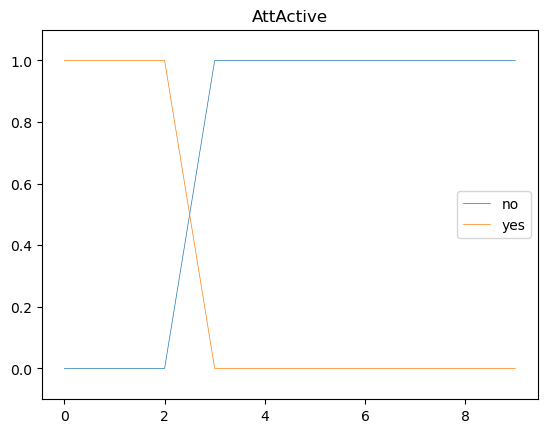

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


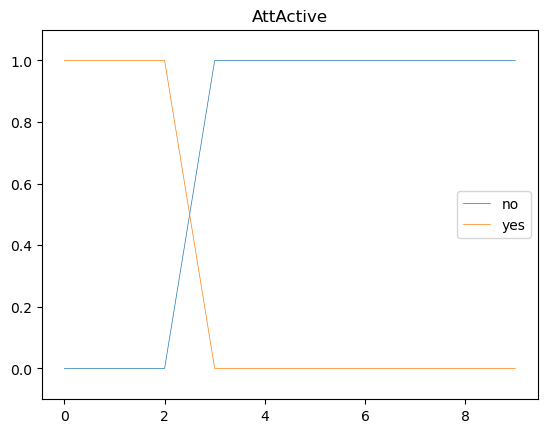

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.006075,9.939252e-01
3,0.998030,1.969757e-03
4,0.999943,5.662724e-05
5,1.000000,3.164236e-07
6,1.000000,1.861315e-08
7,1.000000,2.064927e-10
8,1.000000,1.548628e-12
9,1.000000,0.000000e+00


Plotting ('AttActive', ['no', 'yes']) for agent_j


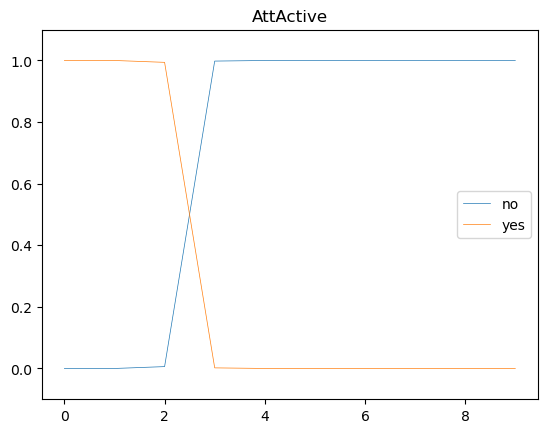

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


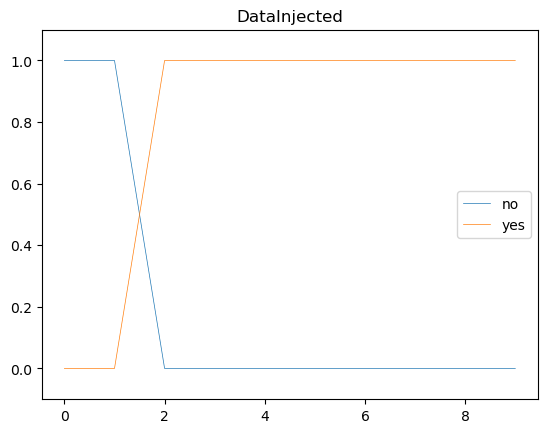

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataInjected', ['no', 'yes']) for agent_i


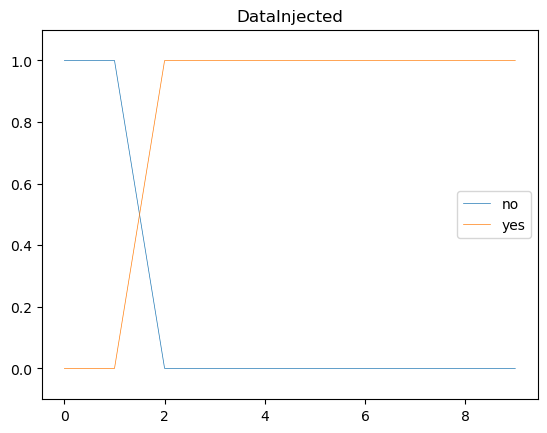

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.046729,0.953271
3,0.016667,0.983333
4,0.015762,0.984238
5,0.015757,0.984243
6,0.015757,0.984243
7,0.015757,0.984243
8,0.015757,0.984243
9,0.015757,0.984243


Plotting ('DataInjected', ['no', 'yes']) for agent_j


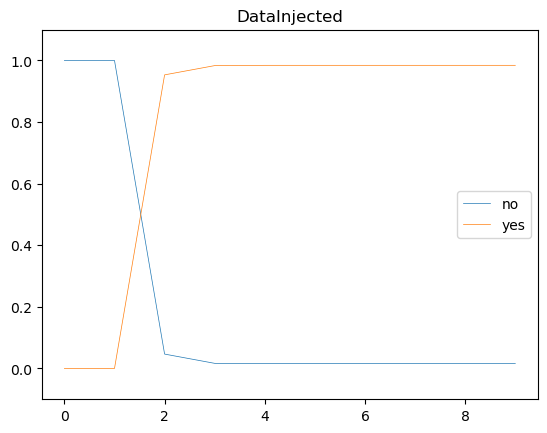

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,FileRecon,denied|user_files|success|active|none,Nop,file_enum
1,ManipulateData,auth|user_files|success|active|none,Nop,file_write
2,Exit,auth|user_files|success|terminated|none,Nop,file_enum
3,Nop,auth|user_files|failure|terminated|none,Nop,none
4,Nop,auth|none|failure|terminated|none,Nop,none
5,Nop,auth|user_files|success|terminated|none,Nop,none
6,Nop,auth|user_files|success|terminated|none,Nop,none
7,Nop,auth|user_files|success|terminated|none,Nop,login_activity
8,Nop,auth|none|failure|terminated|none,Nop,none
9,Nop,denied|user_files|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,7.800000e-02,1.820000e-01,7.400000e-01,0.000000,0.000000
2,0.002091,9.614624e-01,1.918458e-02,1.118692e-02,0.006075,0.000000
3,0.000000,7.714870e-02,0.000000e+00,1.814045e-01,0.721820,0.019627
4,0.000000,1.319948e-02,1.385463e-03,0.000000e+00,0.985415,0.000000
5,0.000000,0.000000e+00,1.588006e-05,6.572415e-05,0.999918,0.000000
6,0.000000,3.895237e-06,1.463491e-07,7.590299e-07,0.999995,0.000000
7,0.000000,4.646758e-08,0.000000e+00,6.790058e-09,1.000000,0.000000
8,0.000000,6.790059e-09,0.000000e+00,0.000000e+00,1.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


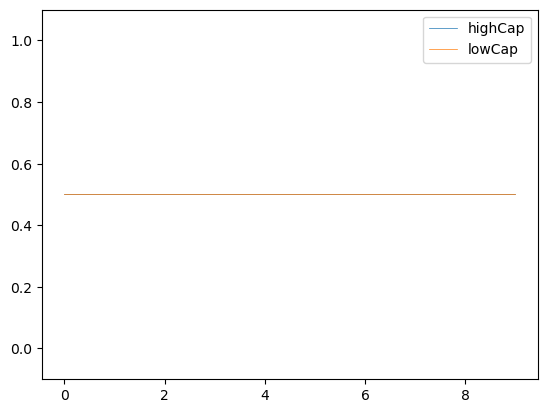

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


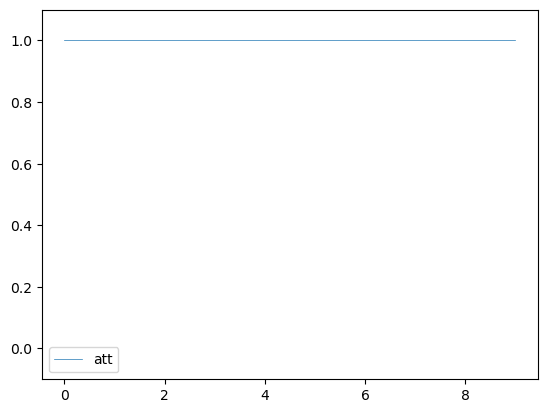

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


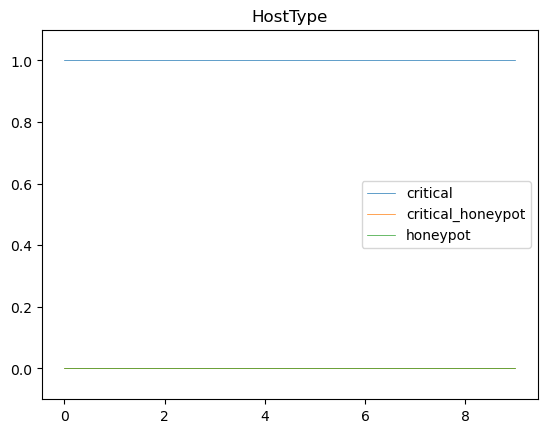

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,0.7,0.0,0.3
2,0.7,0.0,0.3
3,0.7,0.0,0.3
4,0.7,0.0,0.3
5,0.7,0.0,0.3
6,0.7,0.0,0.3
7,0.7,0.0,0.3
8,0.7,0.0,0.3
9,0.7,0.0,0.3


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


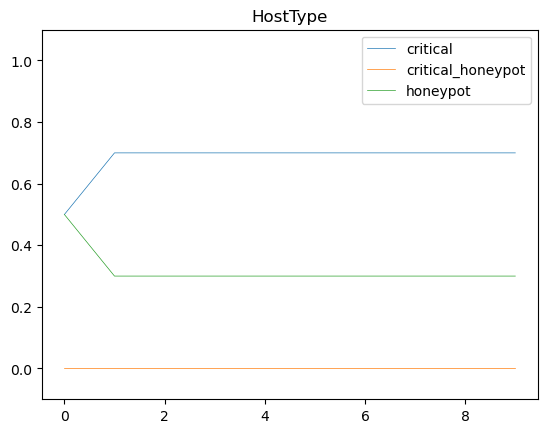

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


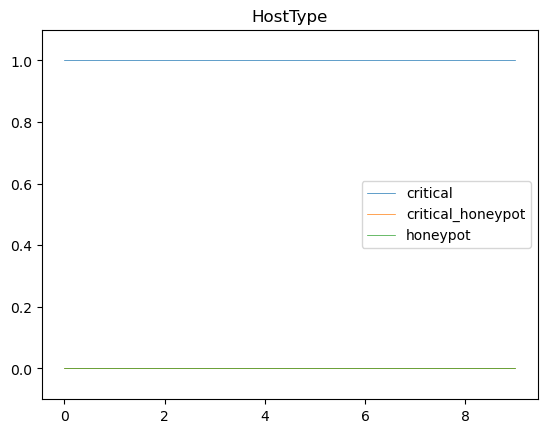

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


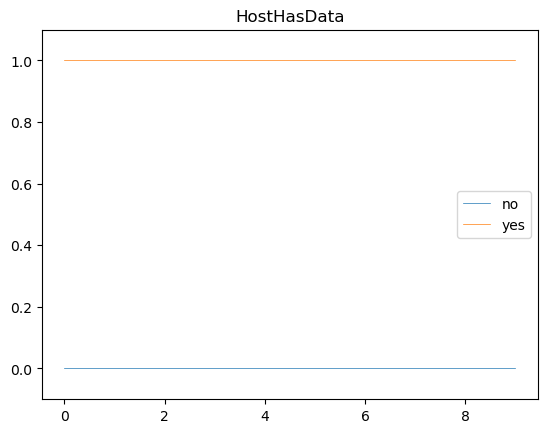

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000139,0.999861
3,0.000139,0.999861
4,0.000139,0.999861
5,0.000139,0.999861
6,0.000139,0.999861
7,0.000139,0.999861
8,0.000139,0.999861
9,0.000139,0.999861


Plotting ('HostHasData', ['no', 'yes']) for agent_i


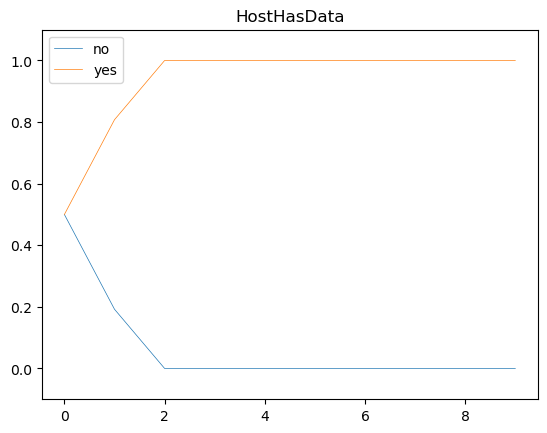

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


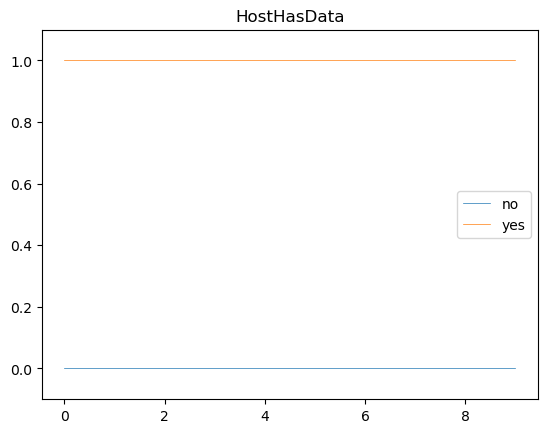

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for state:


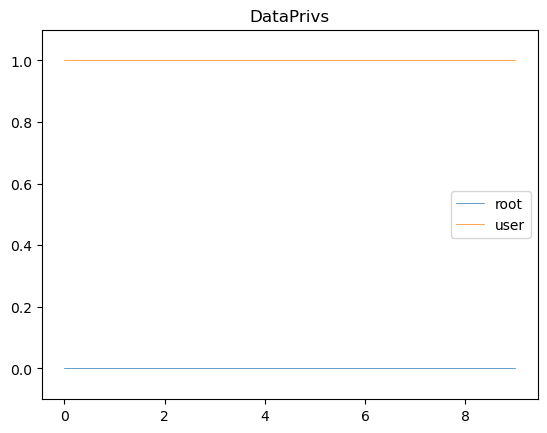

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('DataPrivs', ['root', 'user']) for agent_i


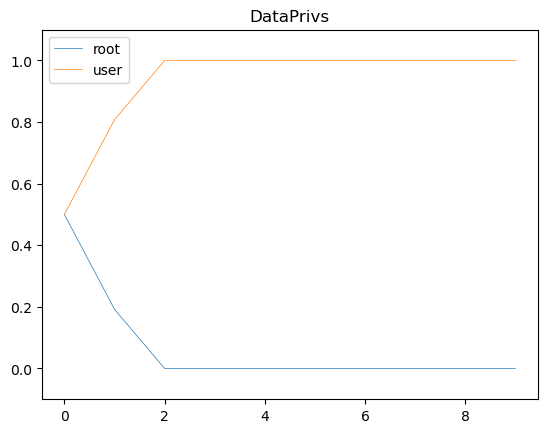

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


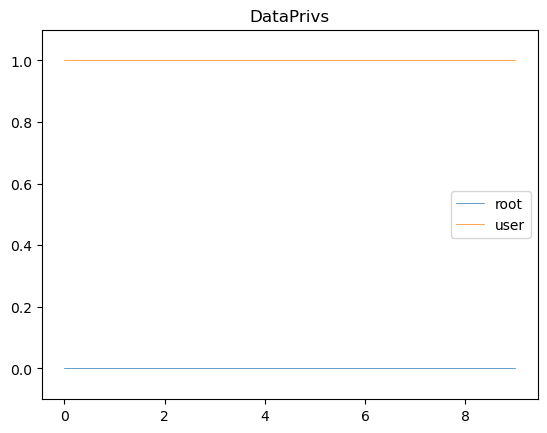

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


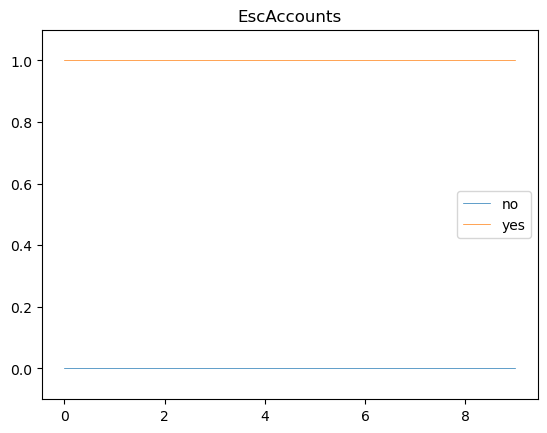

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


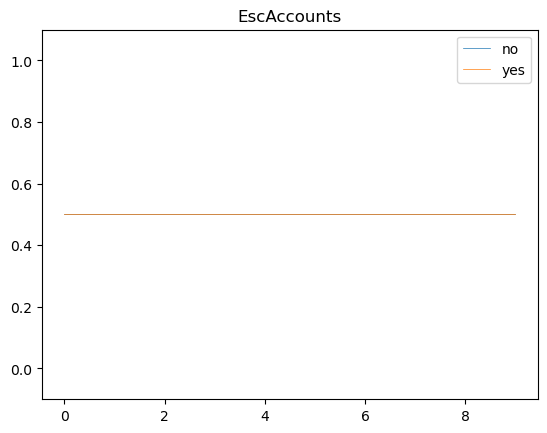

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


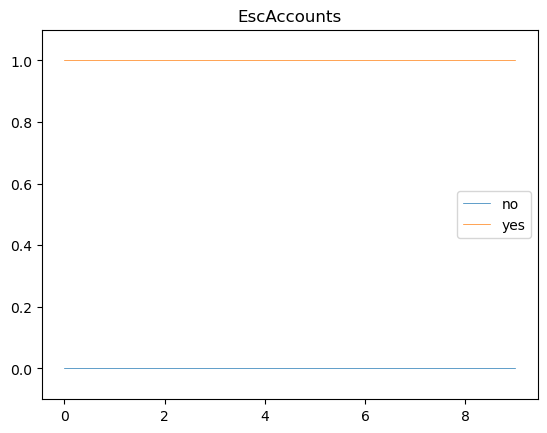

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for state:


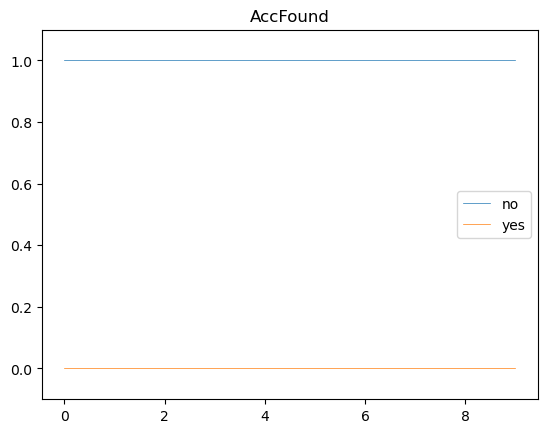

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for agent_i


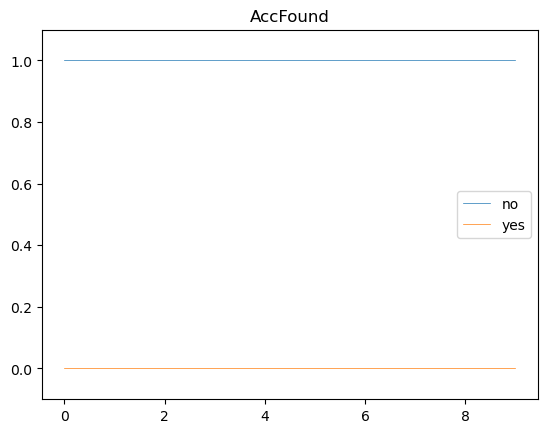

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.978782,0.021218
4,0.995998,0.004002
5,0.997298,0.002702
6,0.997375,0.002625
7,0.997375,0.002625
8,0.997375,0.002625
9,0.997375,0.002625


Plotting ('AccFound', ['no', 'yes']) for agent_j


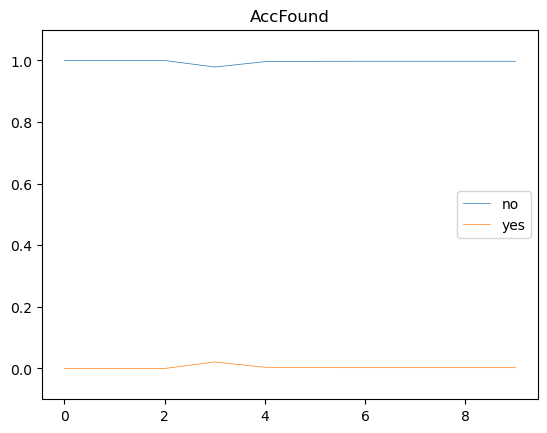

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


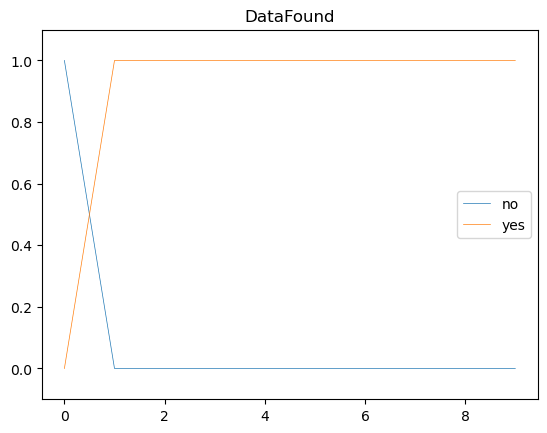

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.307692,0.692308
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataFound', ['no', 'yes']) for agent_i


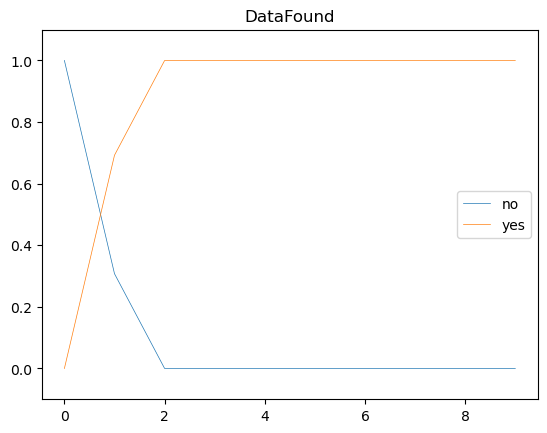

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.032648,0.967352
3,0.072271,0.927729
4,0.070213,0.929787
5,0.069494,0.930506
6,0.069490,0.930510
7,0.069490,0.930510
8,0.069490,0.930510
9,0.069490,0.930510


Plotting ('DataFound', ['no', 'yes']) for agent_j


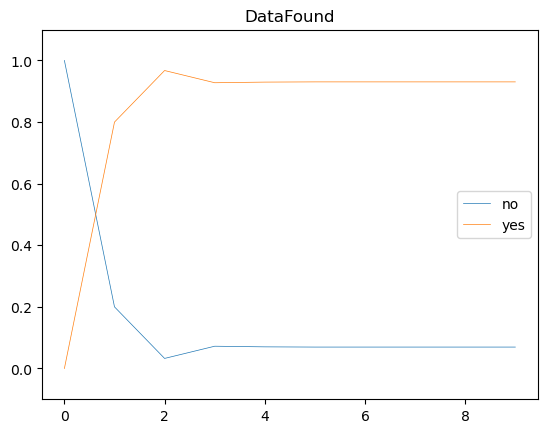

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for state:


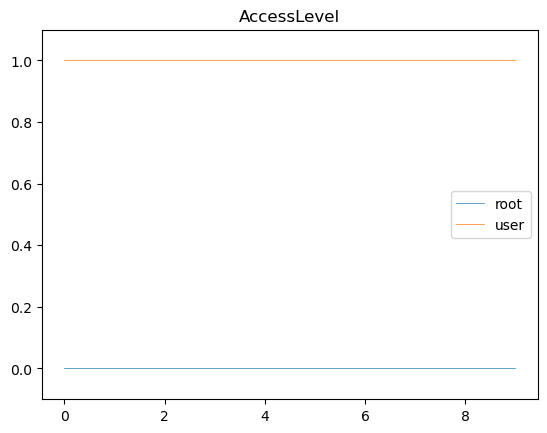

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


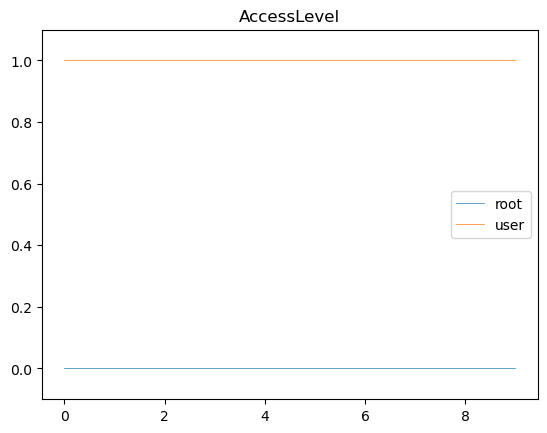

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,0.001385,0.998614
5,0.000082,0.999918
6,0.000005,0.999995
7,0.000004,0.999996
8,0.000004,0.999996
9,0.000004,0.999996


Plotting ('AccessLevel', ['root', 'user']) for agent_j


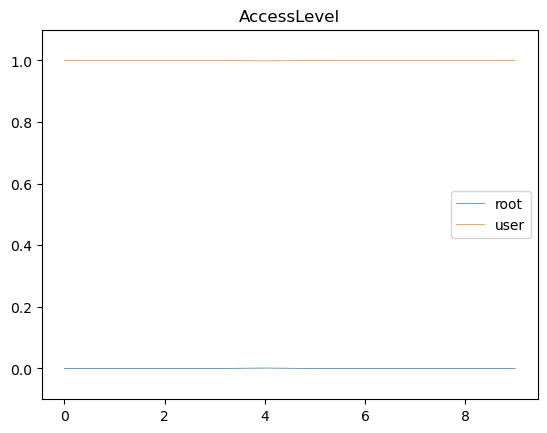

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


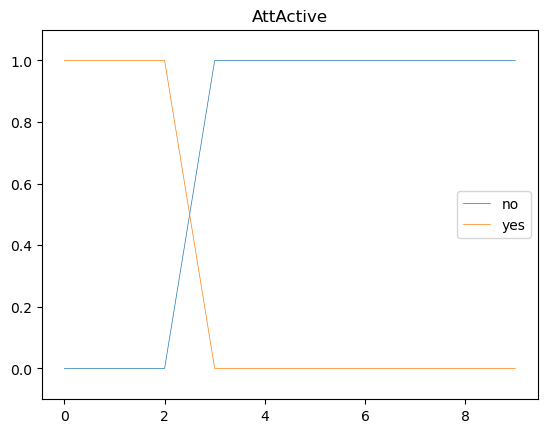

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


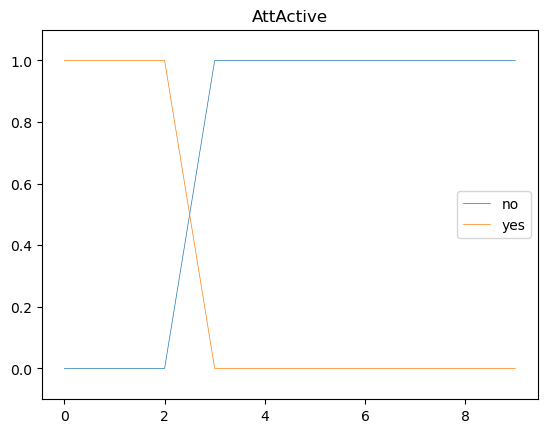

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.006075,9.939252e-01
3,0.721820,2.781801e-01
4,0.985415,1.458494e-02
5,0.999918,8.160421e-05
6,0.999995,4.800616e-06
7,1.000000,5.325764e-08
8,1.000000,6.790059e-09
9,1.000000,0.000000e+00


Plotting ('AttActive', ['no', 'yes']) for agent_j


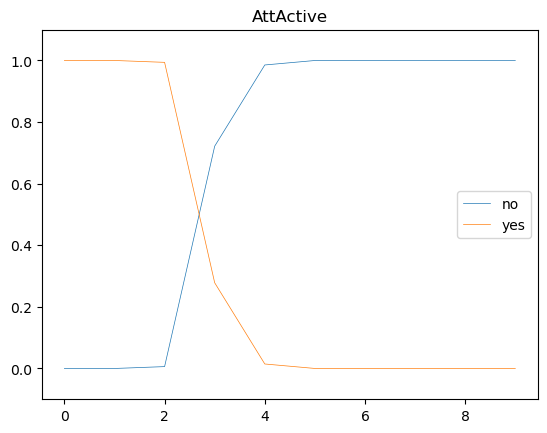

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


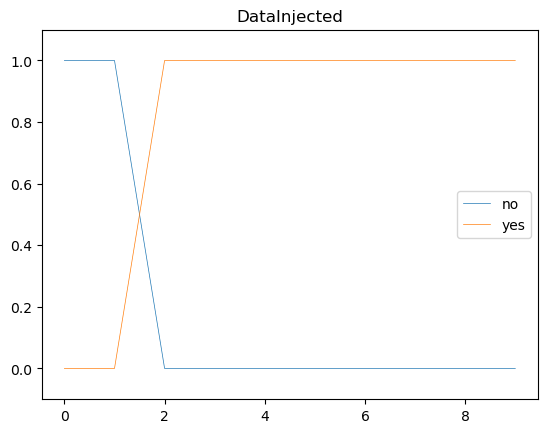

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataInjected', ['no', 'yes']) for agent_i


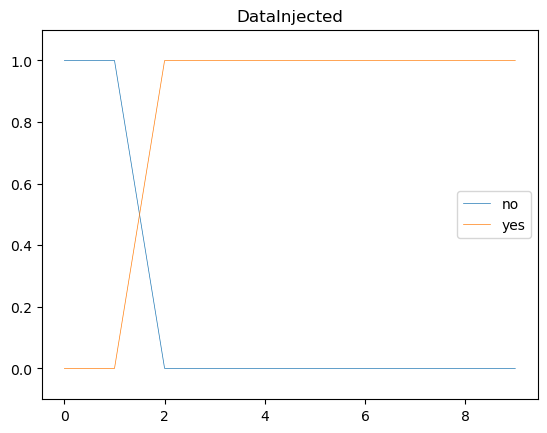

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.046729,0.953271
3,0.272659,0.727341
4,0.099501,0.900499
5,0.098325,0.901675
6,0.098252,0.901748
7,0.098251,0.901749
8,0.098251,0.901749
9,0.098251,0.901749


Plotting ('DataInjected', ['no', 'yes']) for agent_j


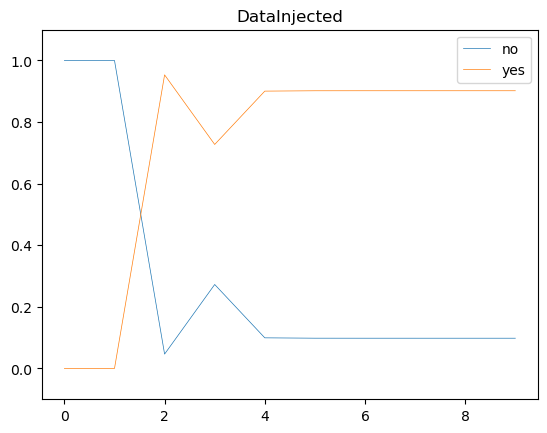

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,FileRecon,denied|user_files|success|active|none,Nop,file_enum
1,ManipulateData,auth|none|success|active|none,Nop,file_write
2,Exit,auth|user_files|success|terminated|none,Nop,none
3,Nop,denied|none|failure|terminated|none,Nop,none
4,Nop,denied|user_files|success|terminated|none,Nop,none
5,Nop,auth|user_files|success|terminated|none,Nop,none
6,Nop,auth|none|failure|terminated|none,Nop,none
7,Nop,auth|none|success|terminated|none,Nop,none
8,Nop,denied|none|success|terminated|none,Nop,none
9,Nop,auth|none|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,7.800000e-02,1.820000e-01,7.400000e-01,0.000000,0.000000
2,0.002091,9.614624e-01,1.918458e-02,1.118692e-02,0.006075,0.000000
3,0.000000,1.007965e-03,0.000000e+00,8.678907e-04,0.998030,0.000094
4,0.000000,5.124807e-05,5.379174e-06,0.000000e+00,0.999943,0.000000
5,0.000000,0.000000e+00,6.157557e-08,2.548480e-07,1.000000,0.000000
6,0.000000,1.510278e-08,5.674312e-10,2.942944e-09,1.000000,0.000000
7,0.000000,1.801660e-10,0.000000e+00,2.632668e-11,1.000000,0.000000
8,0.000000,1.548628e-12,0.000000e+00,0.000000e+00,1.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


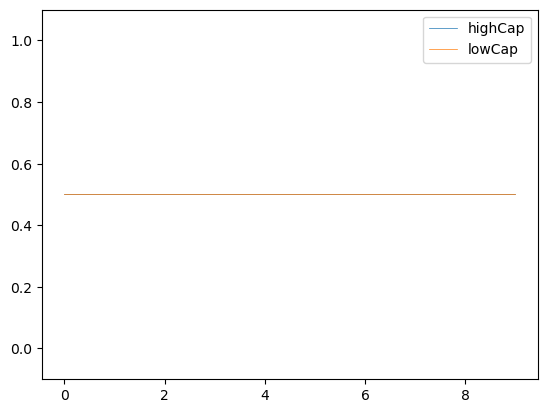

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


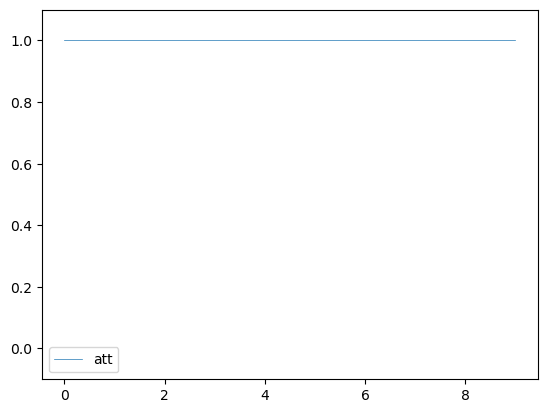

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


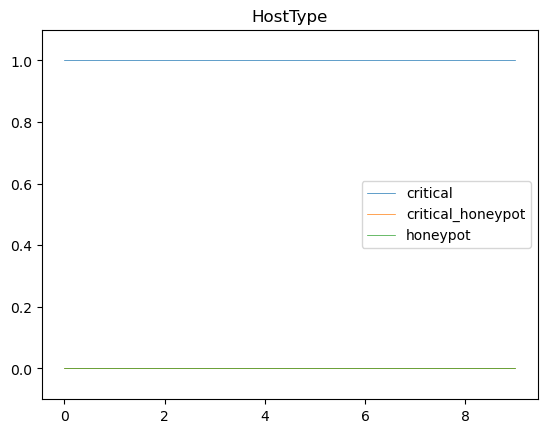

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,0.7,0.0,0.3
2,0.7,0.0,0.3
3,0.7,0.0,0.3
4,0.7,0.0,0.3
5,0.7,0.0,0.3
6,0.7,0.0,0.3
7,0.7,0.0,0.3
8,0.7,0.0,0.3
9,0.7,0.0,0.3


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


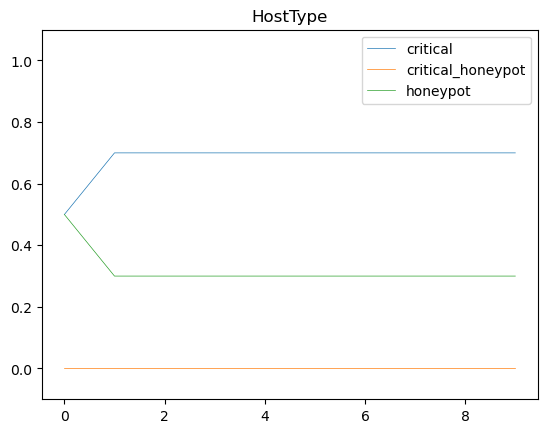

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


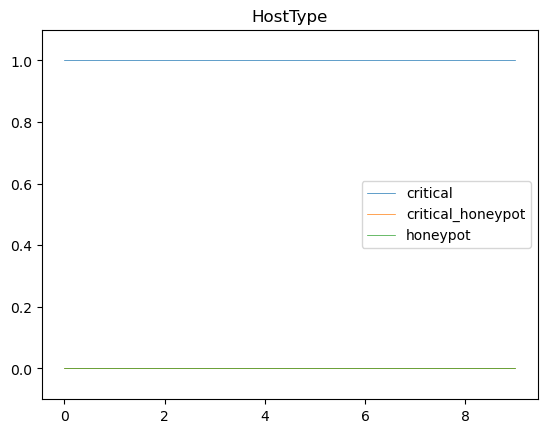

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


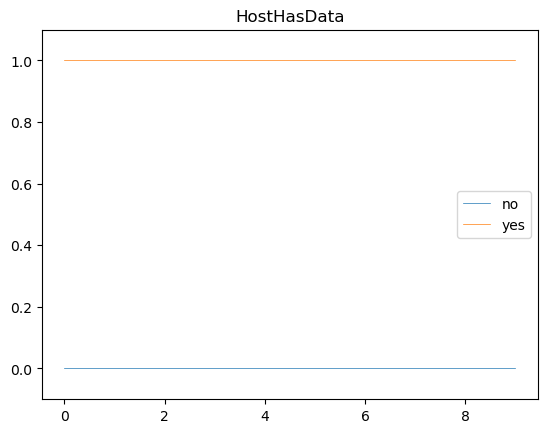

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000139,0.999861
3,0.000139,0.999861
4,0.000139,0.999861
5,0.000139,0.999861
6,0.000139,0.999861
7,0.000139,0.999861
8,0.000139,0.999861
9,0.000139,0.999861


Plotting ('HostHasData', ['no', 'yes']) for agent_i


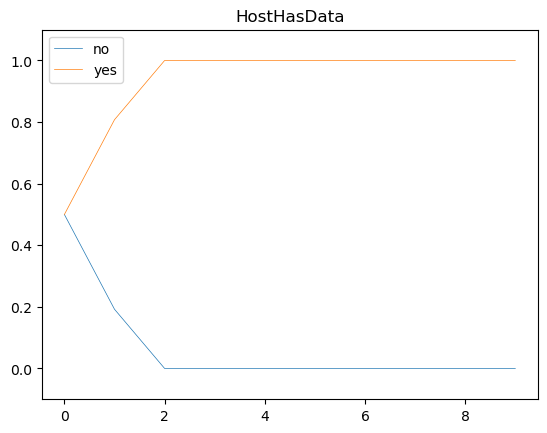

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


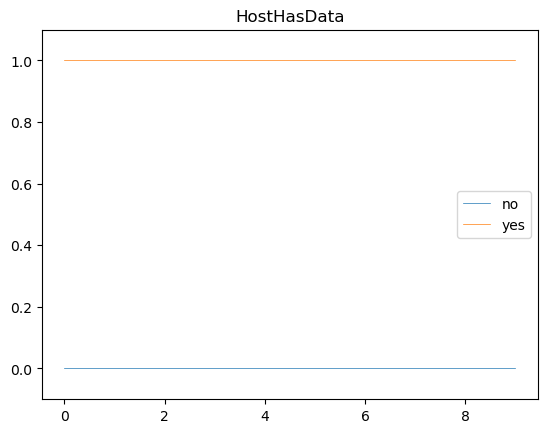

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for state:


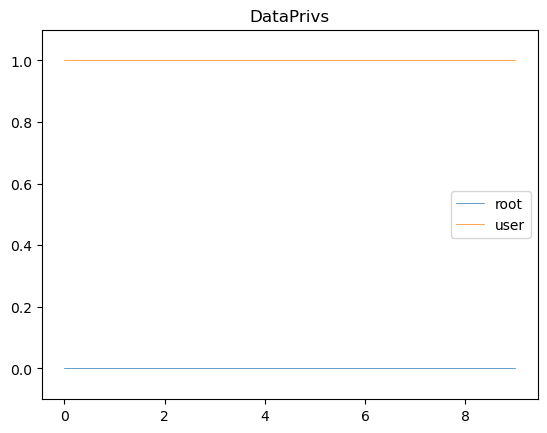

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('DataPrivs', ['root', 'user']) for agent_i


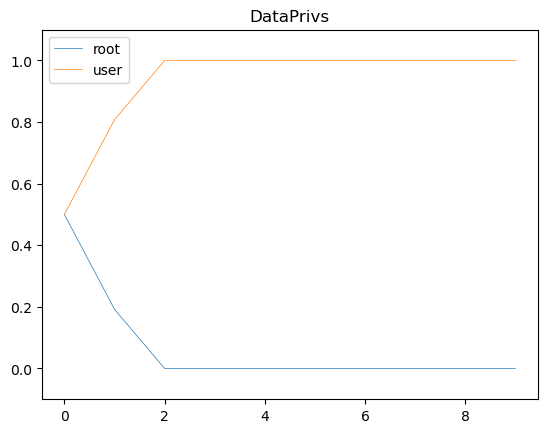

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


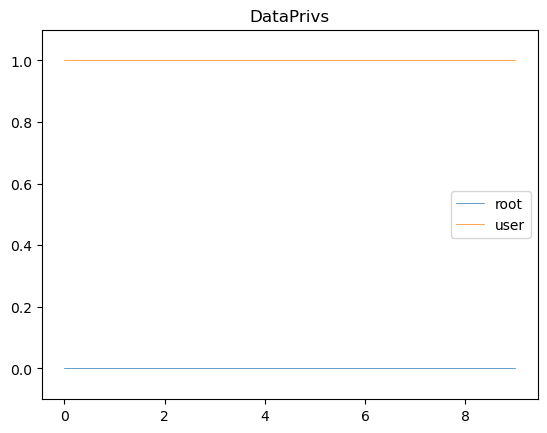

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


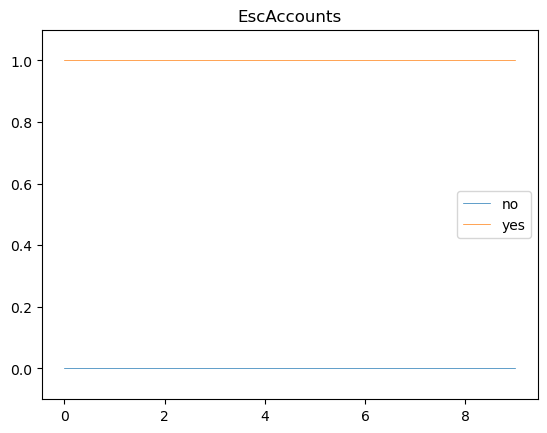

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


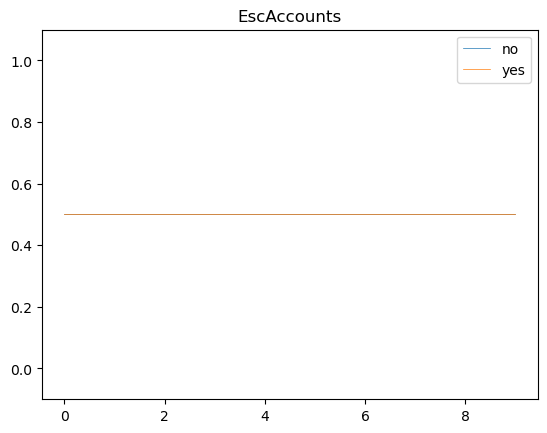

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


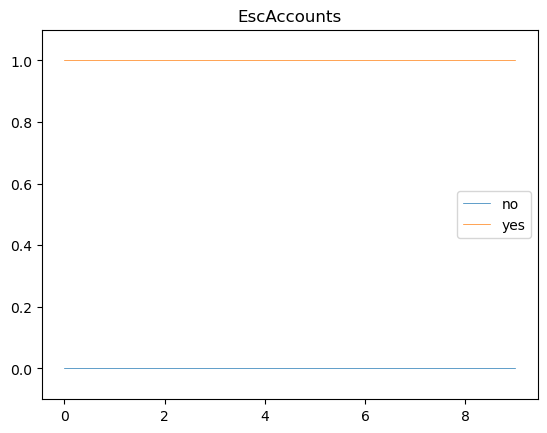

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for state:


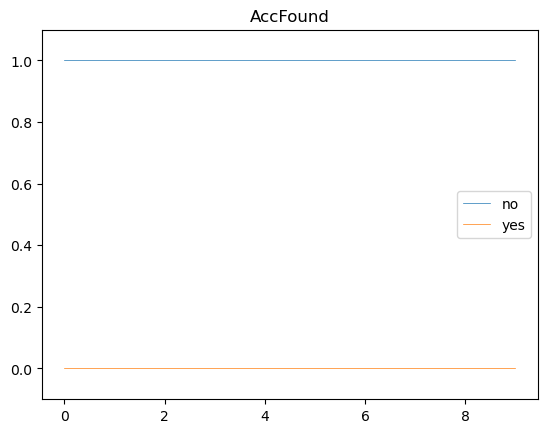

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for agent_i


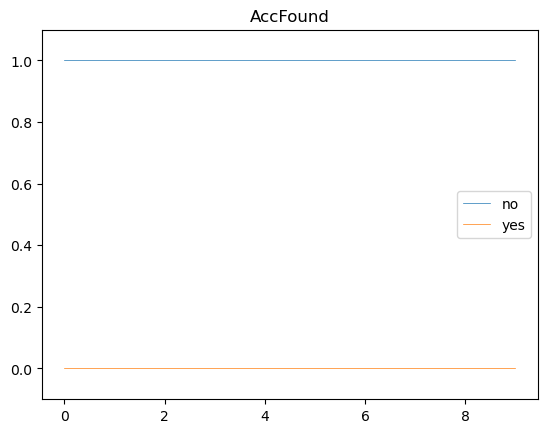

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.999899,0.000102
4,0.999985,0.000016
5,0.999989,0.000010
6,0.999990,0.000010
7,0.999990,0.000010
8,0.999990,0.000010
9,0.999990,0.000010


Plotting ('AccFound', ['no', 'yes']) for agent_j


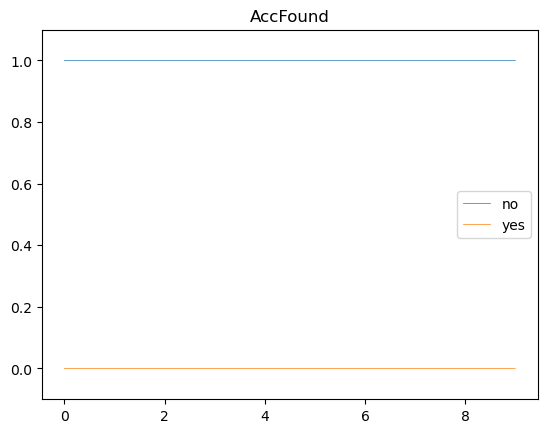

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


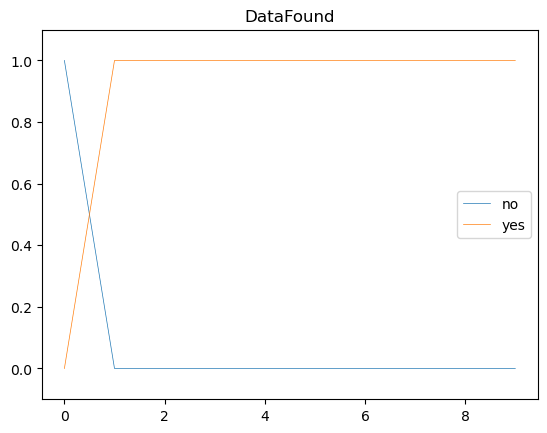

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.307692,0.692308
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataFound', ['no', 'yes']) for agent_i


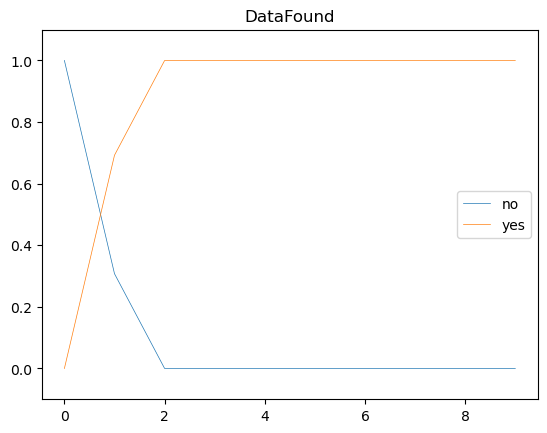

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.032648,0.967352
3,0.013410,0.986590
4,0.013348,0.986652
5,0.013345,0.986654
6,0.013345,0.986655
7,0.013345,0.986655
8,0.013345,0.986655
9,0.013345,0.986655


Plotting ('DataFound', ['no', 'yes']) for agent_j


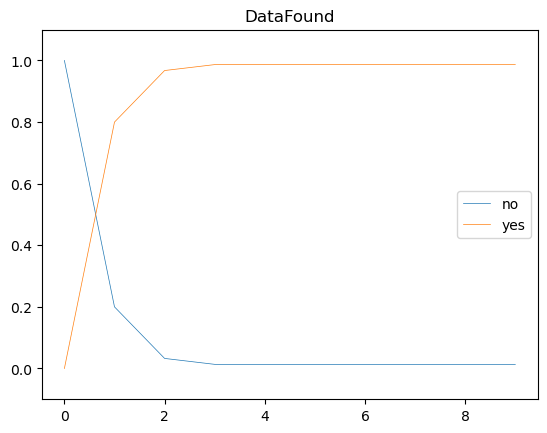

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for state:


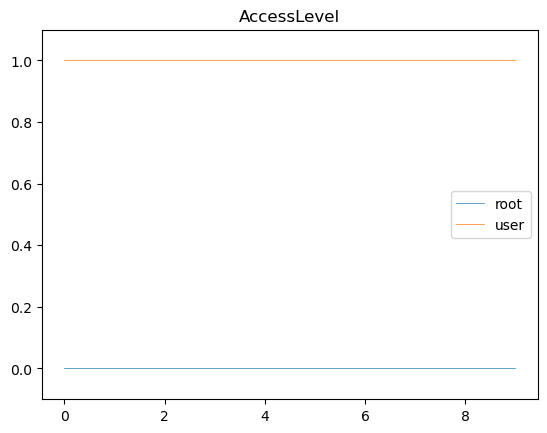

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


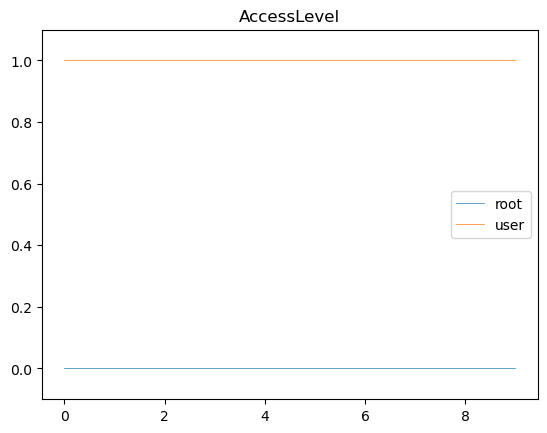

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000e+00,1.000000
1,0.000000e+00,1.000000
2,0.000000e+00,1.000000
3,0.000000e+00,1.000000
4,5.379174e-06,0.999995
5,3.164236e-07,1.000000
6,1.861315e-08,1.000000
7,1.530927e-08,1.000000
8,1.528449e-08,1.000000
9,1.528449e-08,1.000000


Plotting ('AccessLevel', ['root', 'user']) for agent_j


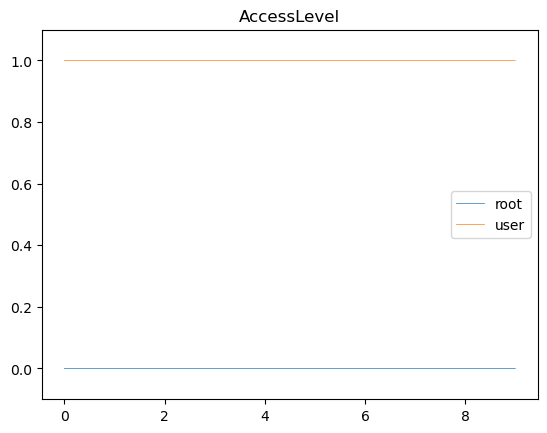

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


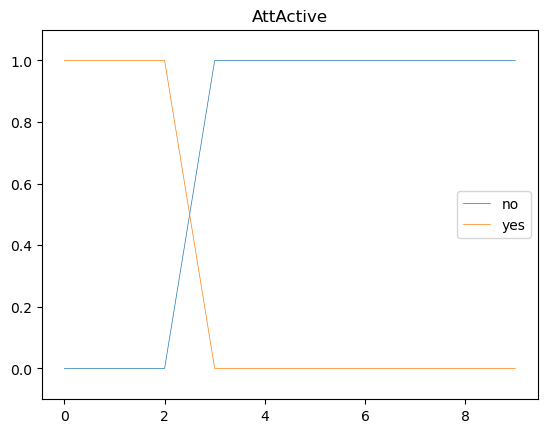

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


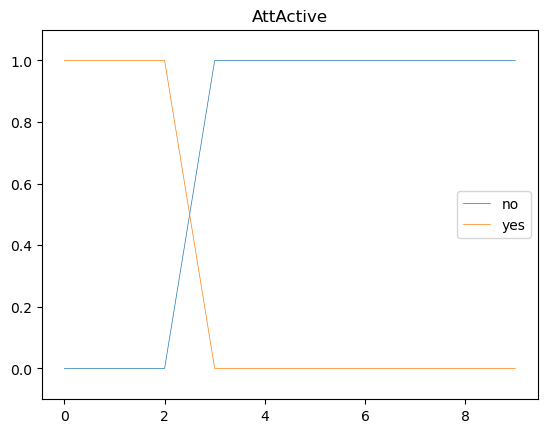

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.006075,9.939252e-01
3,0.998030,1.969757e-03
4,0.999943,5.662724e-05
5,1.000000,3.164236e-07
6,1.000000,1.861315e-08
7,1.000000,2.064927e-10
8,1.000000,1.548628e-12
9,1.000000,0.000000e+00


Plotting ('AttActive', ['no', 'yes']) for agent_j


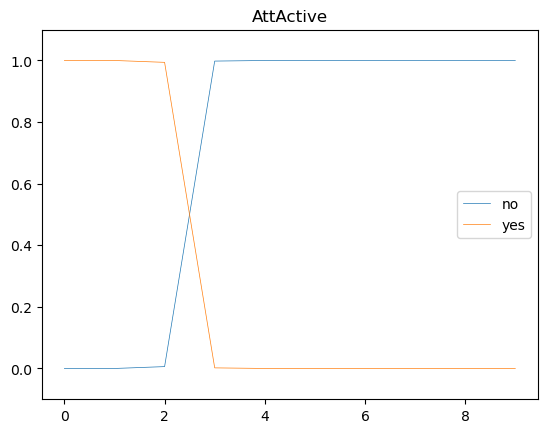

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


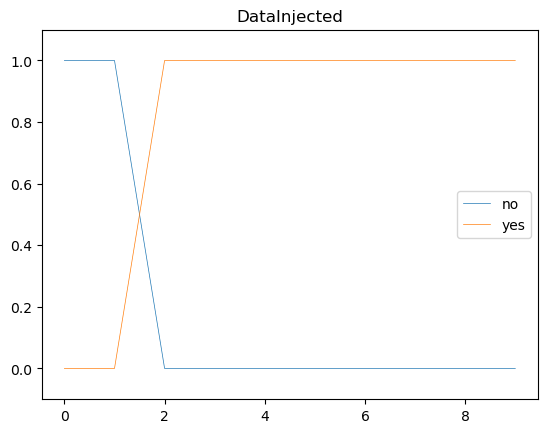

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataInjected', ['no', 'yes']) for agent_i


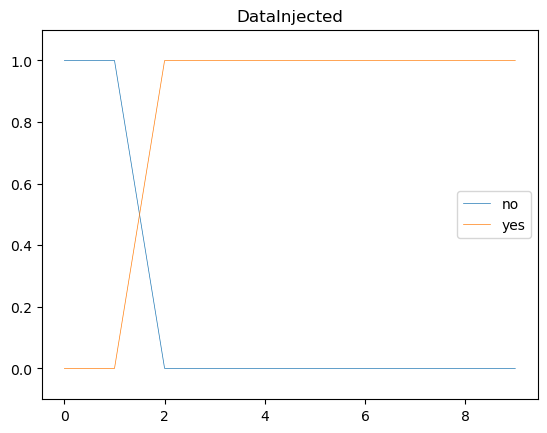

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.046729,0.953271
3,0.016667,0.983333
4,0.015762,0.984238
5,0.015757,0.984243
6,0.015757,0.984243
7,0.015757,0.984243
8,0.015757,0.984243
9,0.015757,0.984243


Plotting ('DataInjected', ['no', 'yes']) for agent_j


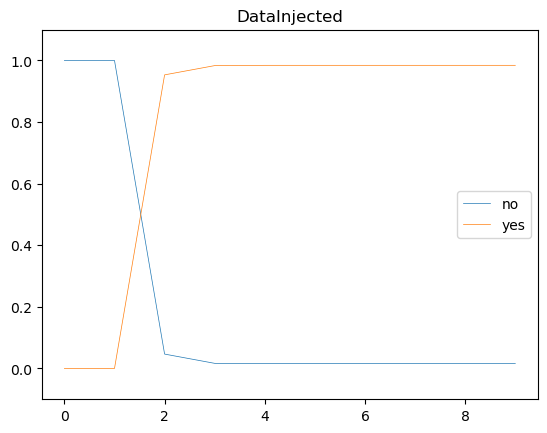

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,FileRecon,denied|user_files|success|active|none,Nop,file_enum
1,ManipulateData,auth|user_files|success|active|none,Nop,file_write
2,Exit,denied|none|failure|terminated|none,Nop,none
3,Nop,denied|user_files|failure|terminated|none,Nop,file_enum
4,Nop,auth|none|failure|terminated|none,Nop,none
5,Nop,denied|user_files|failure|terminated|none,Nop,none
6,Nop,auth|user_files|failure|terminated|none,Nop,none
7,Nop,auth|none|failure|terminated|none,Nop,file_write
8,Nop,denied|none|success|terminated|none,Nop,none
9,Nop,auth|none|success|terminated|none,Nop,file_enum


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,7.800000e-02,1.820000e-01,7.400000e-01,0.000000,0.000000
2,0.002091,9.614624e-01,1.918458e-02,1.118692e-02,0.006075,0.000000
3,0.000000,1.007965e-03,0.000000e+00,8.678907e-04,0.998030,0.000094
4,0.000000,8.704286e-04,9.136318e-05,0.000000e+00,0.999038,0.000000
5,0.000000,0.000000e+00,1.045922e-06,4.328845e-06,0.999995,0.000000
6,0.000000,2.565369e-07,9.638425e-09,4.998904e-08,1.000000,0.000000
7,0.000000,3.060312e-09,0.000000e+00,4.471869e-10,1.000000,0.000000
8,0.000000,7.602178e-09,0.000000e+00,0.000000e+00,1.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


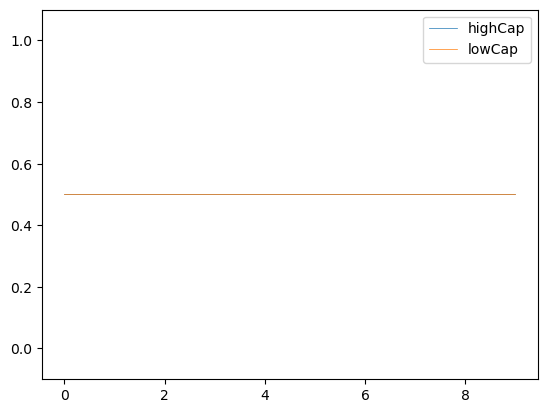

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


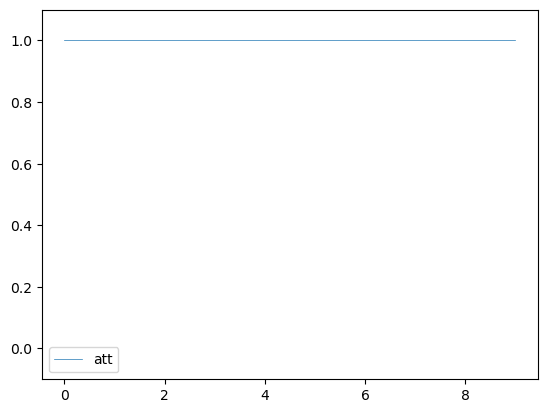

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


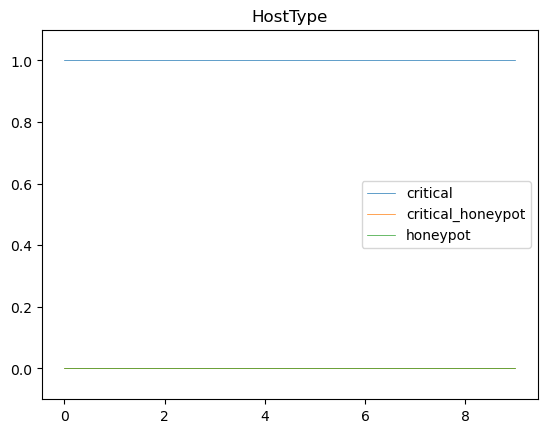

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,0.7,0.0,0.3
2,0.7,0.0,0.3
3,0.7,0.0,0.3
4,0.7,0.0,0.3
5,0.7,0.0,0.3
6,0.7,0.0,0.3
7,0.7,0.0,0.3
8,0.7,0.0,0.3
9,0.7,0.0,0.3


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


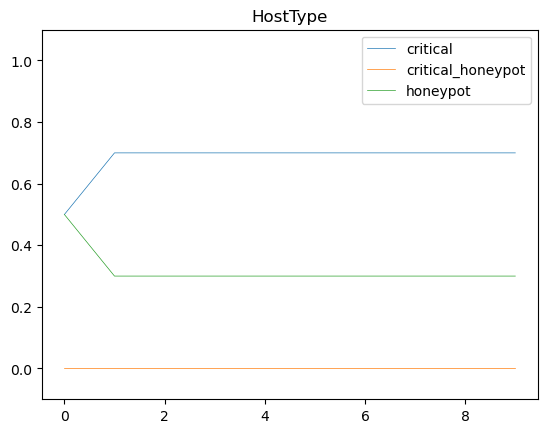

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


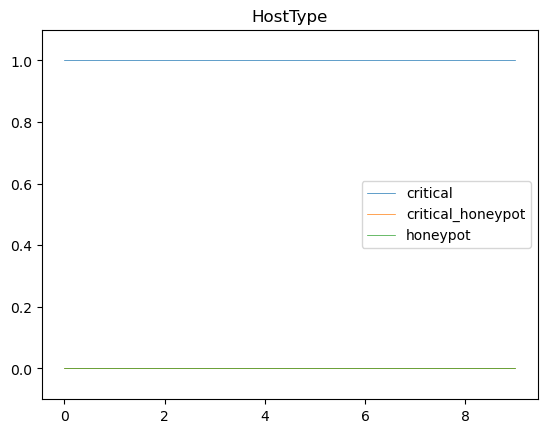

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


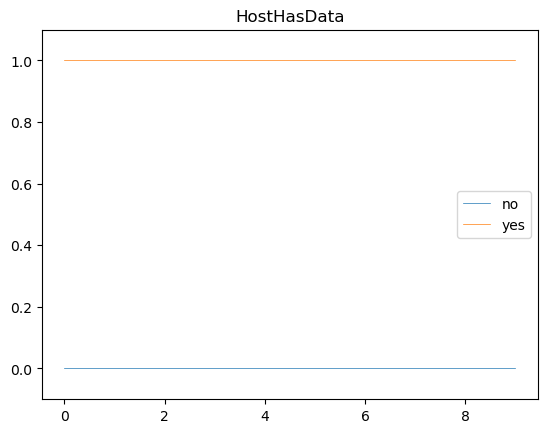

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000139,0.999861
3,0.000139,0.999861
4,0.000139,0.999861
5,0.000139,0.999861
6,0.000139,0.999861
7,0.000139,0.999861
8,0.000139,0.999861
9,0.000139,0.999861


Plotting ('HostHasData', ['no', 'yes']) for agent_i


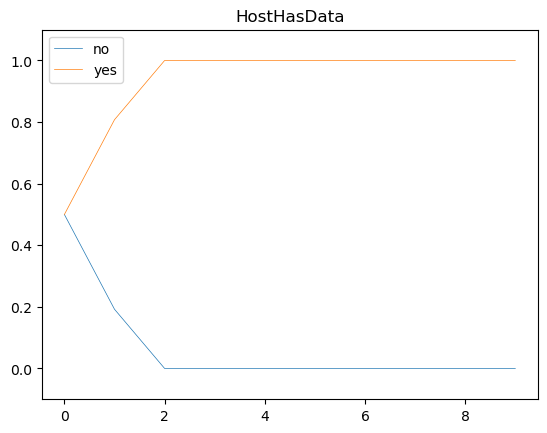

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


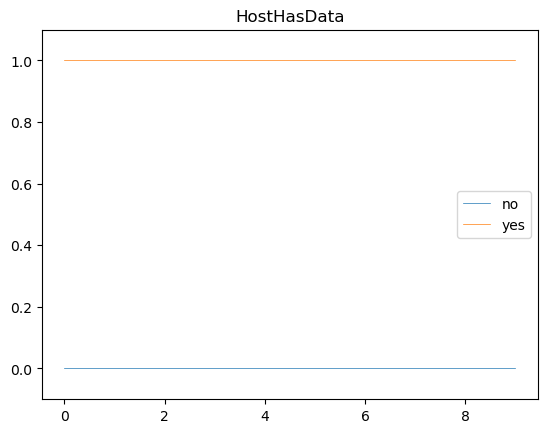

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for state:


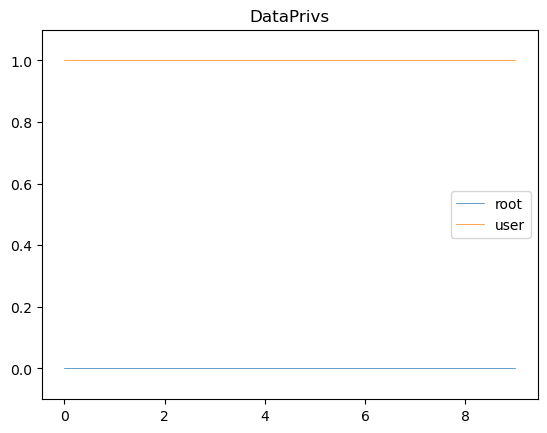

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('DataPrivs', ['root', 'user']) for agent_i


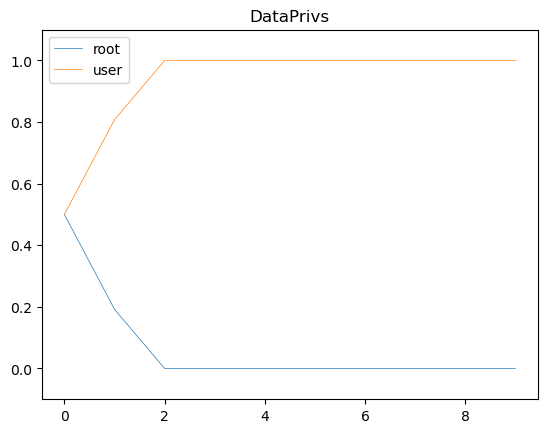

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


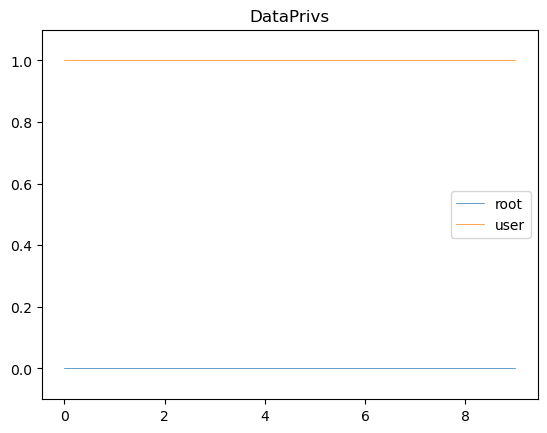

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


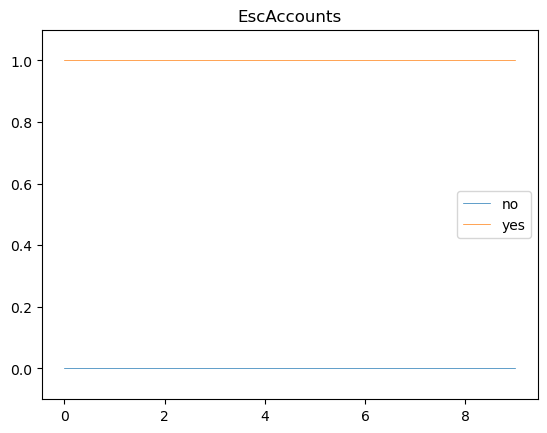

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


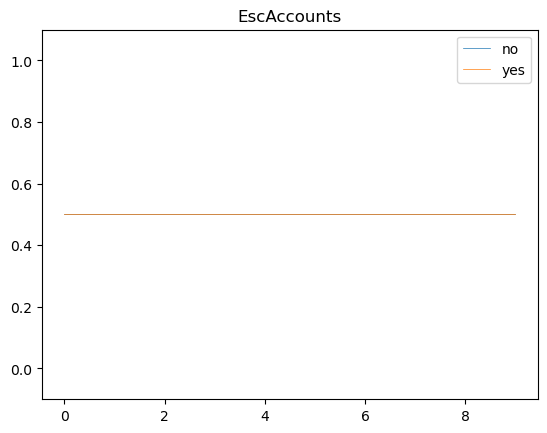

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


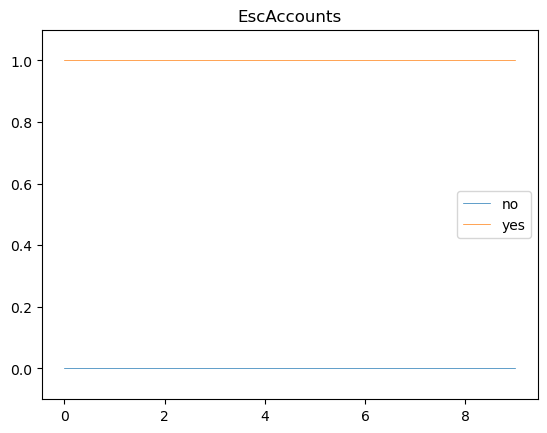

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for state:


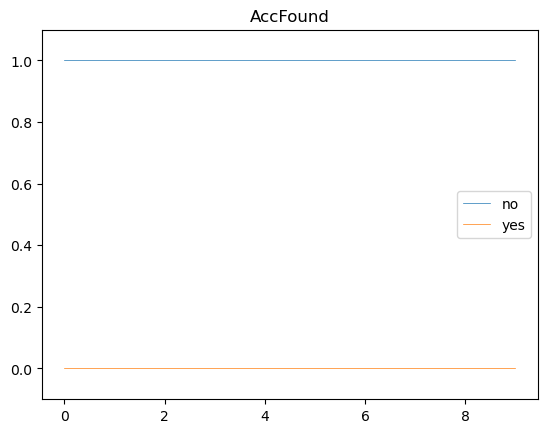

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for agent_i


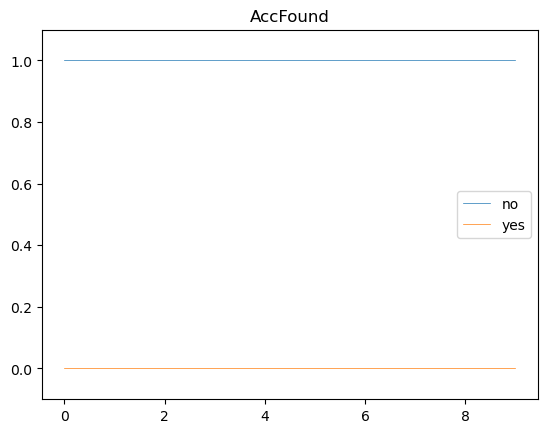

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.999899,0.000102
4,0.999899,0.000102
5,0.999985,0.000016
6,0.999989,0.000010
7,0.999990,0.000010
8,0.999990,0.000010
9,0.999990,0.000010


Plotting ('AccFound', ['no', 'yes']) for agent_j


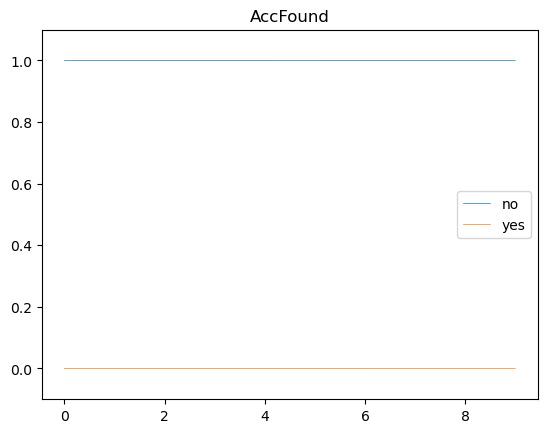

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


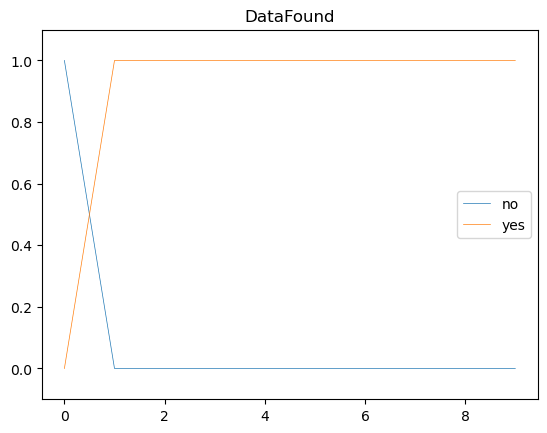

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.307692,0.692308
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataFound', ['no', 'yes']) for agent_i


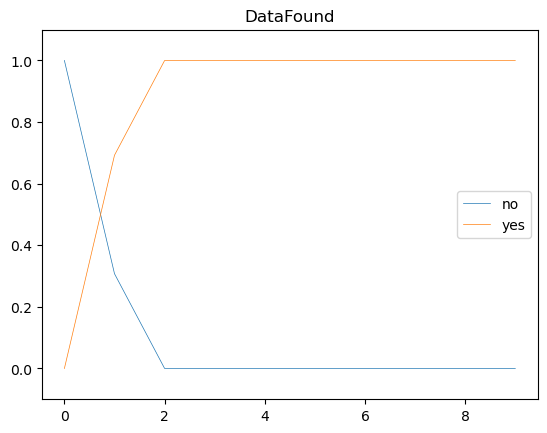

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.032648,0.967352
3,0.013410,0.986590
4,0.013410,0.986590
5,0.013358,0.986642
6,0.013357,0.986643
7,0.013357,0.986643
8,0.013357,0.986643
9,0.013357,0.986643


Plotting ('DataFound', ['no', 'yes']) for agent_j


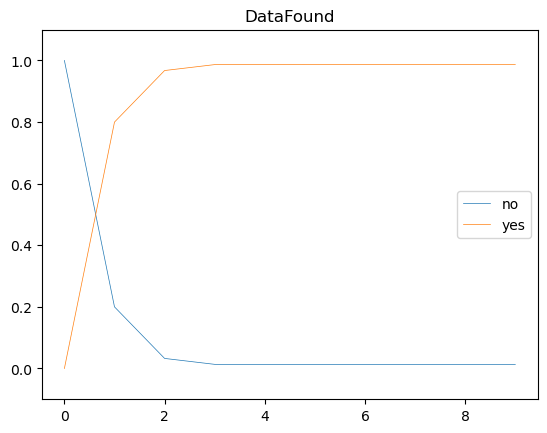

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for state:


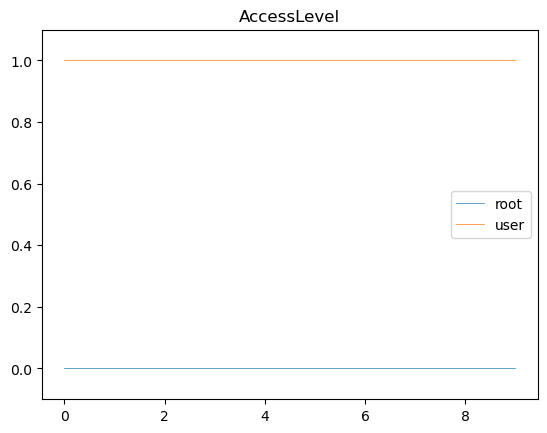

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


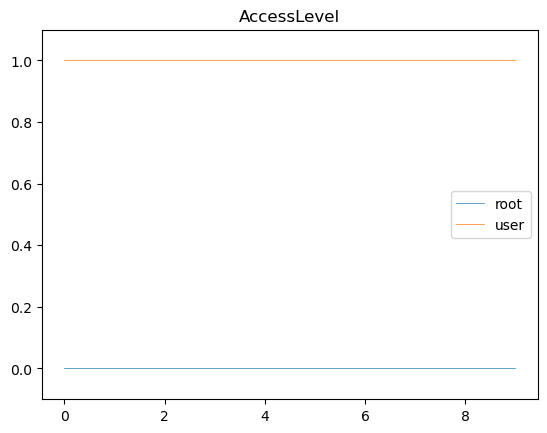

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000e+00,1.000000
1,0.000000e+00,1.000000
2,0.000000e+00,1.000000
3,0.000000e+00,1.000000
4,9.136318e-05,0.999909
5,5.374766e-06,0.999995
6,3.161643e-07,1.000000
7,2.600444e-07,1.000000
8,2.671994e-07,1.000000
9,2.671994e-07,1.000000


Plotting ('AccessLevel', ['root', 'user']) for agent_j


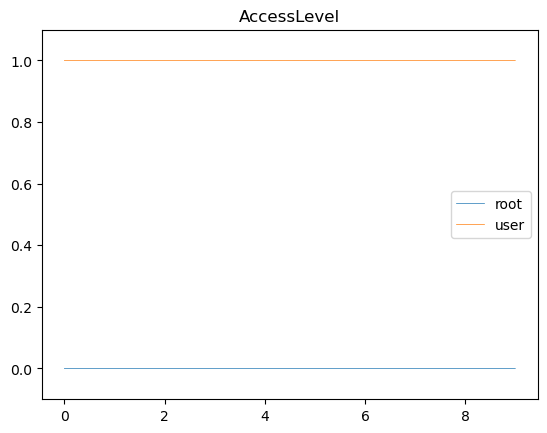

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


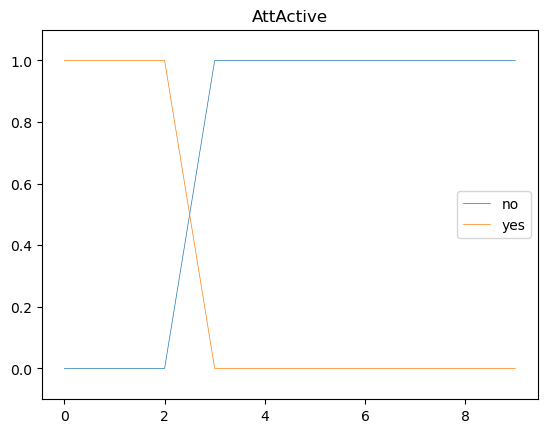

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


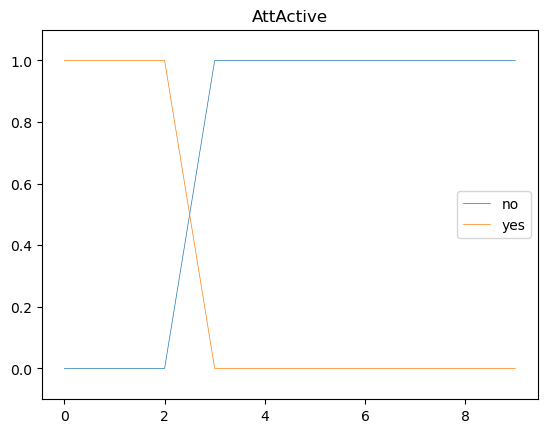

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.006075,9.939252e-01
3,0.998030,1.969757e-03
4,0.999038,9.617918e-04
5,0.999995,5.374766e-06
6,1.000000,3.161643e-07
7,1.000000,3.507499e-09
8,1.000000,7.602178e-09
9,1.000000,0.000000e+00


Plotting ('AttActive', ['no', 'yes']) for agent_j


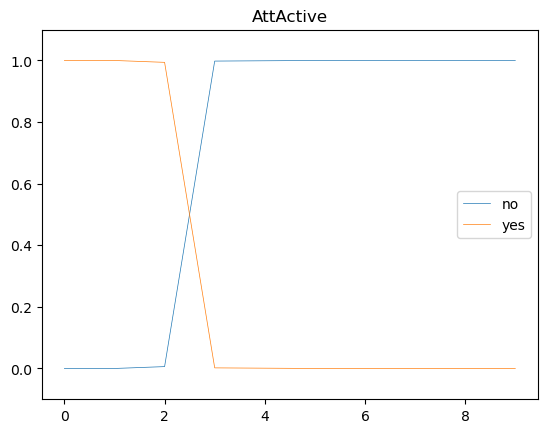

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


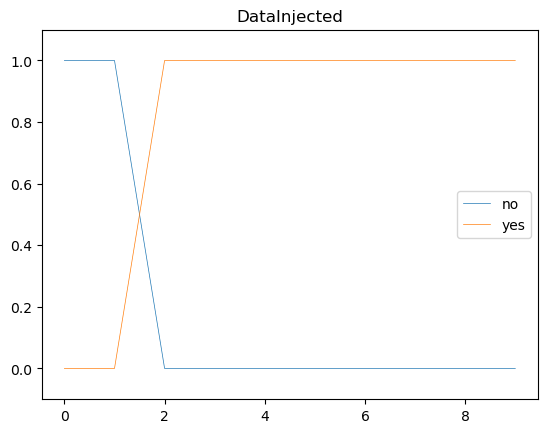

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataInjected', ['no', 'yes']) for agent_i


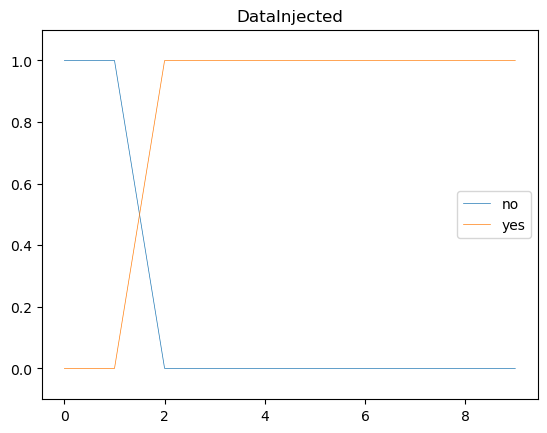

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.046729,0.953271
3,0.016667,0.983333
4,0.015858,0.984143
5,0.015773,0.984227
6,0.015768,0.984232
7,0.015768,0.984232
8,0.015768,0.984232
9,0.015768,0.984232


Plotting ('DataInjected', ['no', 'yes']) for agent_j


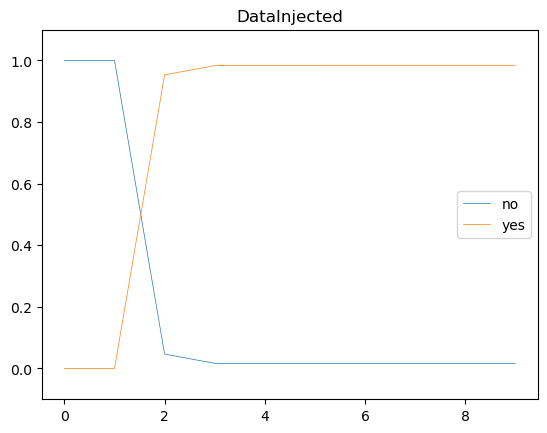

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,FileRecon,denied|user_files|success|active|none,Nop,file_enum
1,ManipulateData,auth|user_files|success|active|none,Nop,file_write
2,Exit,denied|user_files|failure|terminated|none,Nop,none
3,Nop,denied|none|failure|terminated|none,Nop,none
4,Nop,denied|user_files|failure|terminated|none,Nop,none
5,Nop,auth|user_files|success|terminated|none,Nop,login_activity
6,Nop,denied|user_files|failure|terminated|none,Nop,none
7,Nop,denied|user_files|failure|terminated|none,Nop,none
8,Nop,auth|user_files|success|terminated|none,Nop,none
9,Nop,denied|none|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.000000,7.800000e-02,1.820000e-01,7.400000e-01,0.000000,0.000000
2,0.002091,9.614624e-01,1.918458e-02,1.118692e-02,0.006075,0.000000
3,0.000000,1.007965e-03,0.000000e+00,8.678907e-04,0.998030,0.000094
4,0.000000,5.124807e-05,5.379174e-06,0.000000e+00,0.999943,0.000000
5,0.000000,0.000000e+00,6.157557e-08,2.548480e-07,1.000000,0.000000
6,0.000000,2.567472e-07,9.646329e-09,5.003004e-08,1.000000,0.000000
7,0.000000,3.062821e-09,0.000000e+00,4.475535e-10,1.000000,0.000000
8,0.000000,2.632668e-11,0.000000e+00,0.000000e+00,1.000000,0.000000
9,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


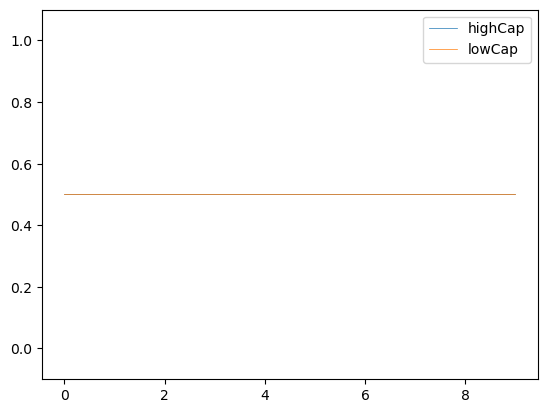

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


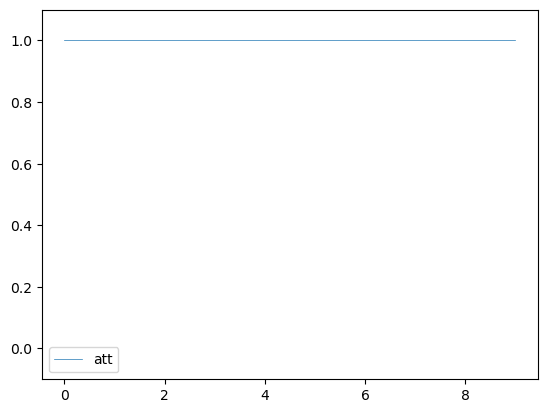

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


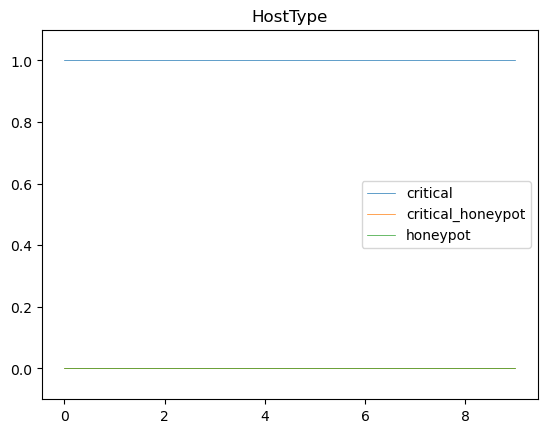

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,0.7,0.0,0.3
2,0.7,0.0,0.3
3,0.7,0.0,0.3
4,0.7,0.0,0.3
5,0.7,0.0,0.3
6,0.7,0.0,0.3
7,0.7,0.0,0.3
8,0.7,0.0,0.3
9,0.7,0.0,0.3


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


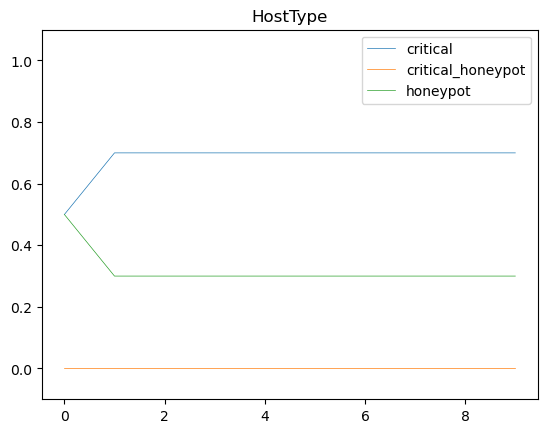

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


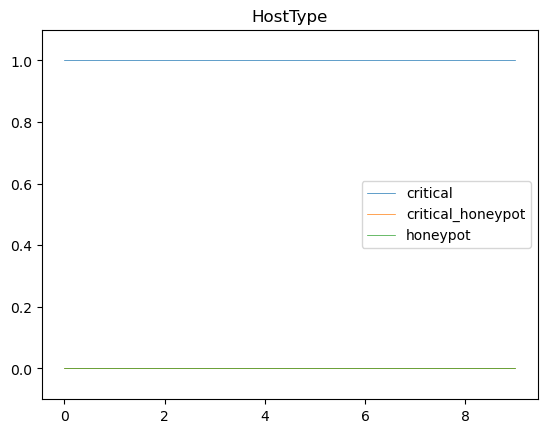

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


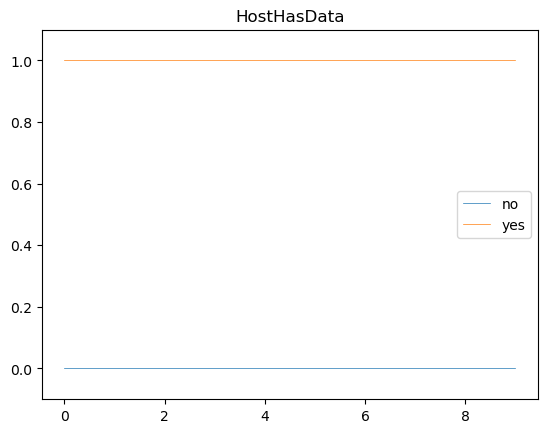

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000139,0.999861
3,0.000139,0.999861
4,0.000139,0.999861
5,0.000139,0.999861
6,0.000139,0.999861
7,0.000139,0.999861
8,0.000139,0.999861
9,0.000139,0.999861


Plotting ('HostHasData', ['no', 'yes']) for agent_i


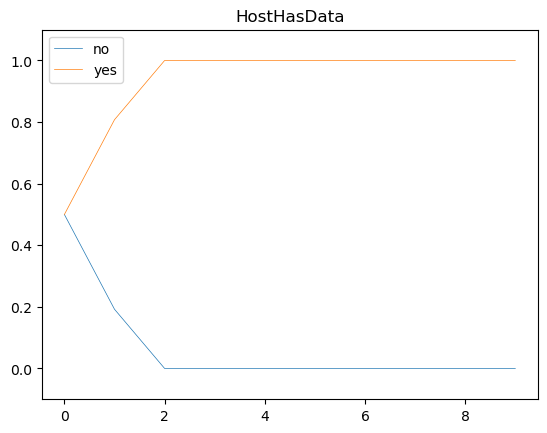

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


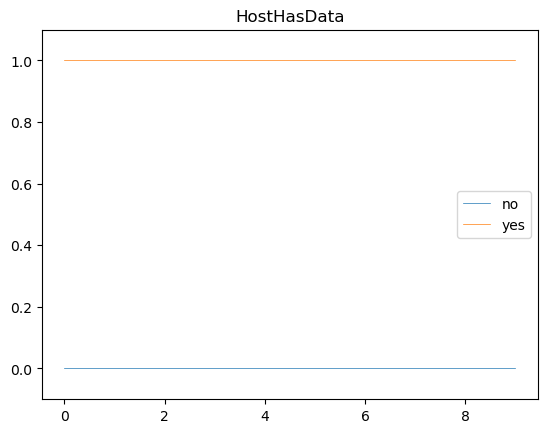

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for state:


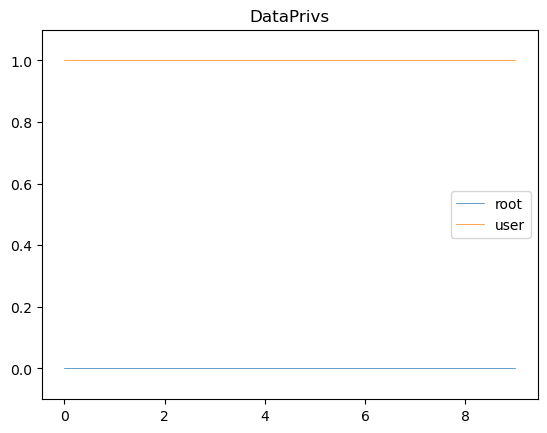

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.500000,0.500000
1,0.192308,0.807692
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('DataPrivs', ['root', 'user']) for agent_i


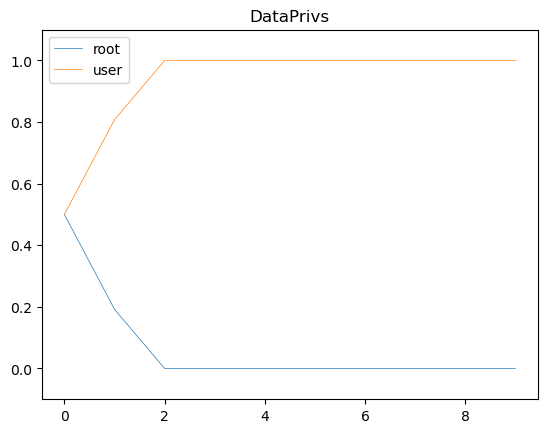

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


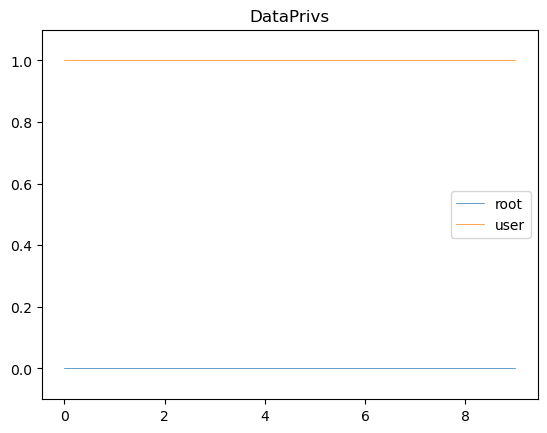

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


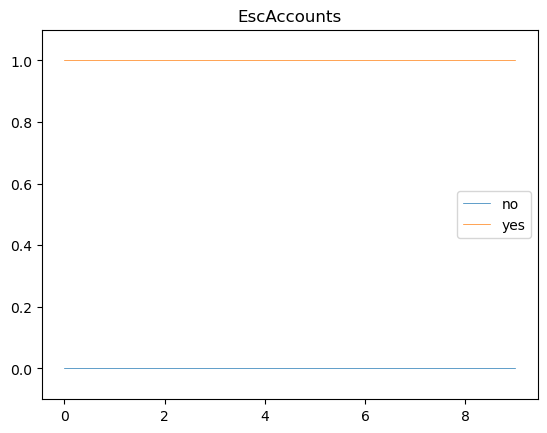

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


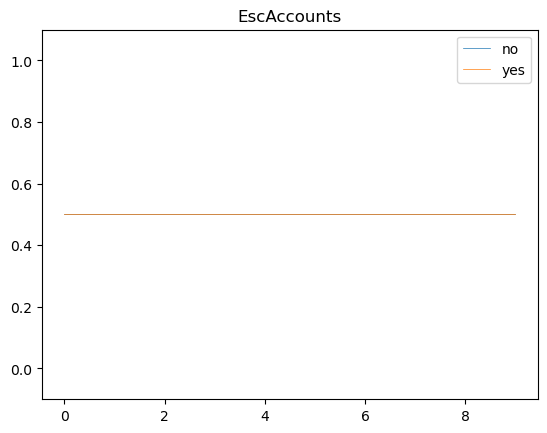

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


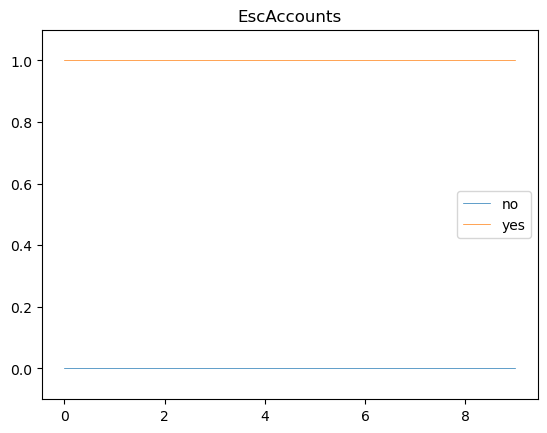

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for state:


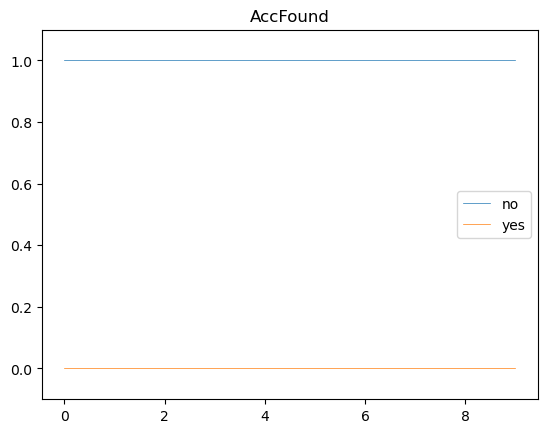

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccFound', ['no', 'yes']) for agent_i


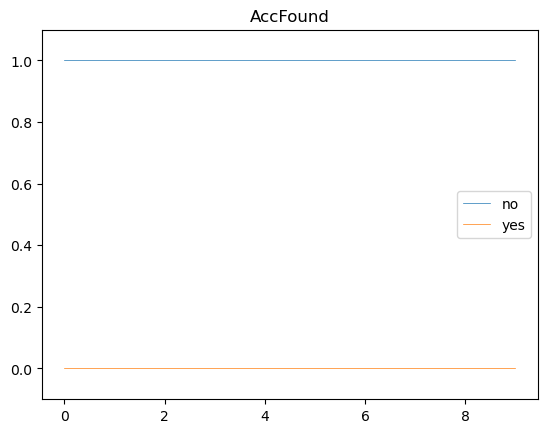

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.999899,0.000102
4,0.999985,0.000016
5,0.999989,0.000010
6,0.999989,0.000010
7,0.999989,0.000010
8,0.999989,0.000010
9,0.999989,0.000010


Plotting ('AccFound', ['no', 'yes']) for agent_j


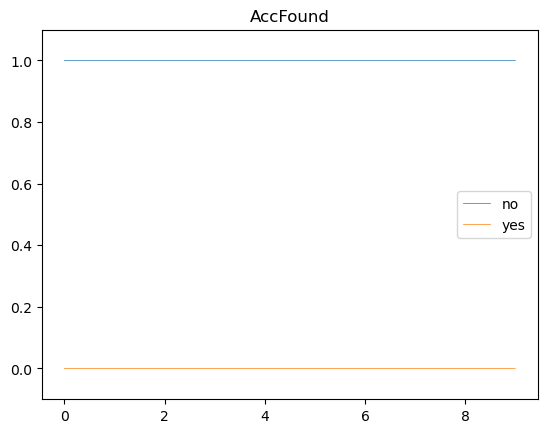

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


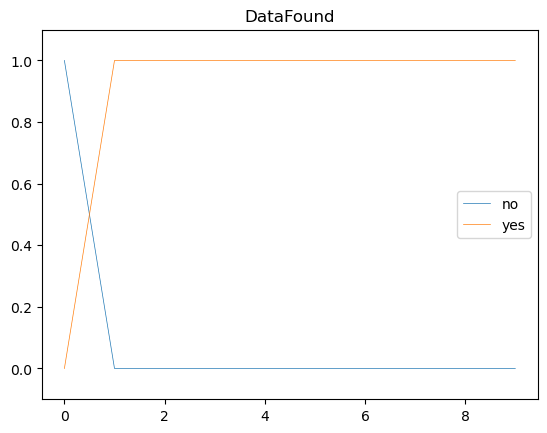

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.307692,0.692308
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataFound', ['no', 'yes']) for agent_i


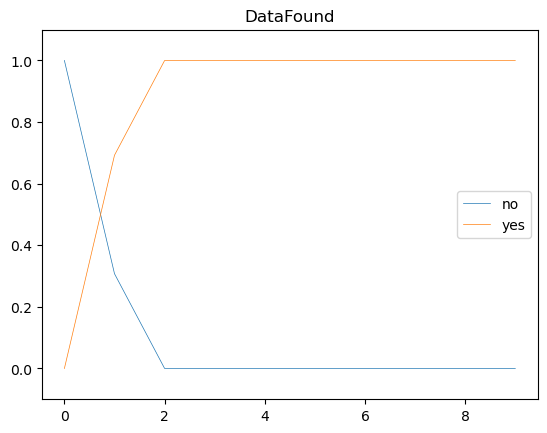

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.032648,0.967352
3,0.013410,0.986590
4,0.013348,0.986652
5,0.013345,0.986654
6,0.013345,0.986655
7,0.013345,0.986654
8,0.013345,0.986654
9,0.013345,0.986654


Plotting ('DataFound', ['no', 'yes']) for agent_j


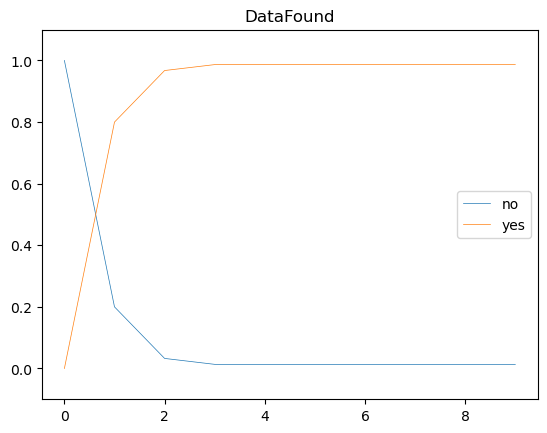

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for state:


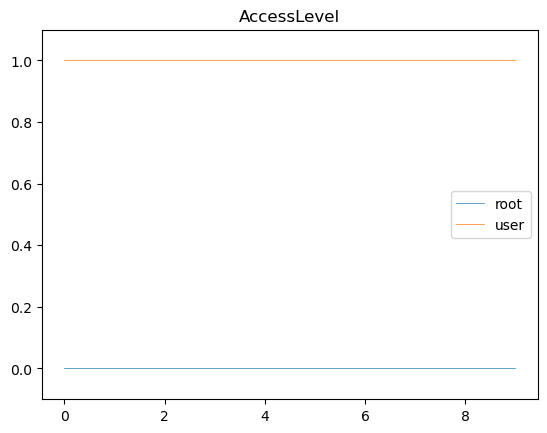

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


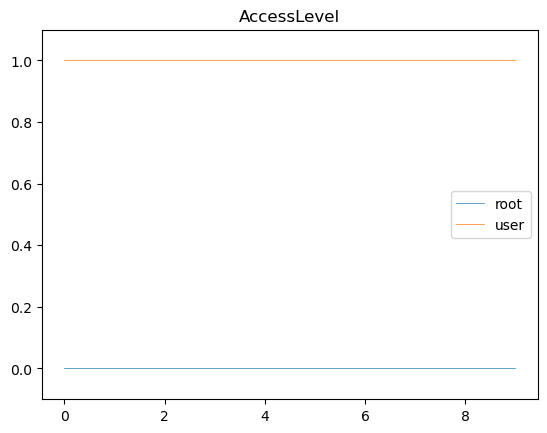

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000e+00,1.000000
1,0.000000e+00,1.000000
2,0.000000e+00,1.000000
3,0.000000e+00,1.000000
4,5.379174e-06,0.999995
5,3.164236e-07,1.000000
6,3.164236e-07,1.000000
7,2.602576e-07,1.000000
8,2.598364e-07,1.000000
9,2.598364e-07,1.000000


Plotting ('AccessLevel', ['root', 'user']) for agent_j


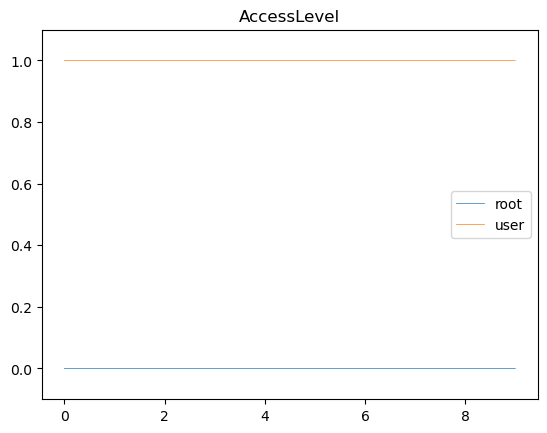

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


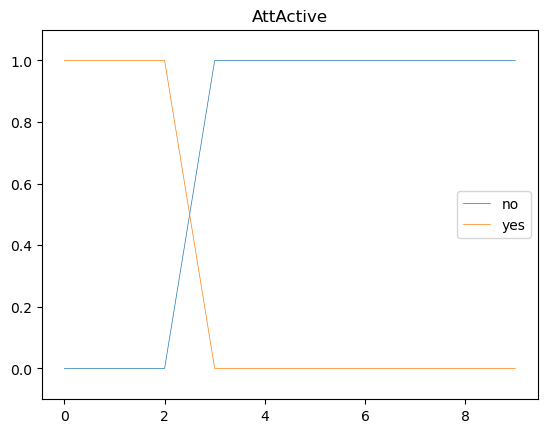

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


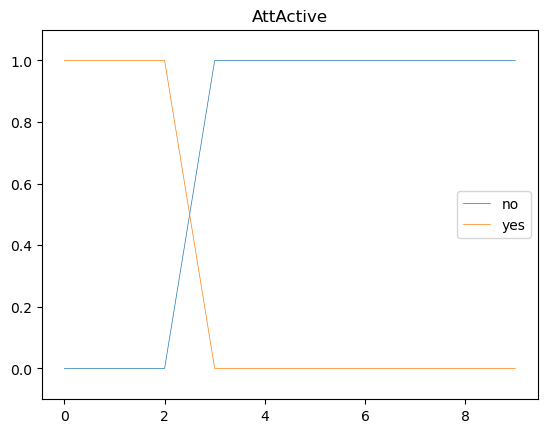

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.006075,9.939252e-01
3,0.998030,1.969757e-03
4,0.999943,5.662724e-05
5,1.000000,3.164236e-07
6,1.000000,3.164236e-07
7,1.000000,3.510374e-09
8,1.000000,2.632668e-11
9,1.000000,0.000000e+00


Plotting ('AttActive', ['no', 'yes']) for agent_j


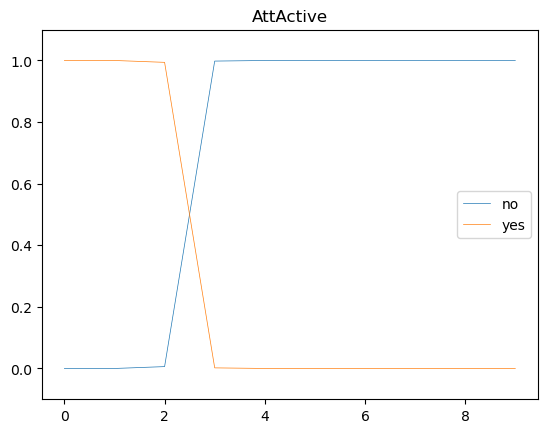

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


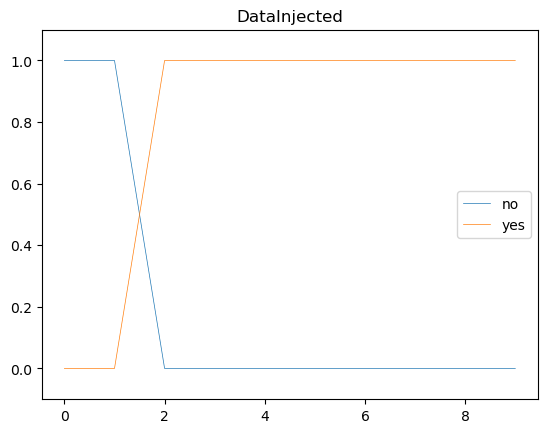

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000167,0.999833
3,0.000167,0.999833
4,0.000167,0.999833
5,0.000167,0.999833
6,0.000167,0.999833
7,0.000167,0.999833
8,0.000167,0.999833
9,0.000167,0.999833


Plotting ('DataInjected', ['no', 'yes']) for agent_i


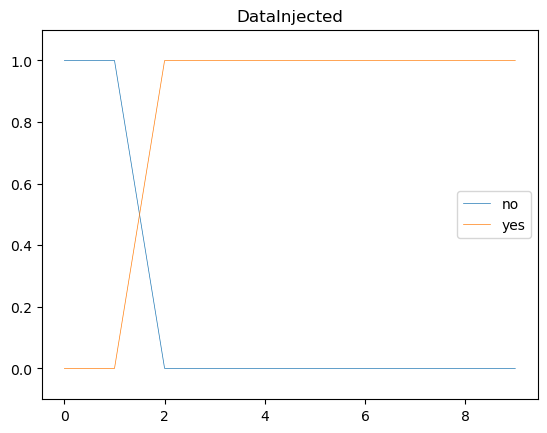

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.046729,0.953271
3,0.016667,0.983333
4,0.015762,0.984238
5,0.015757,0.984243
6,0.015757,0.984243
7,0.015757,0.984243
8,0.015757,0.984243
9,0.015757,0.984243


Plotting ('DataInjected', ['no', 'yes']) for agent_j


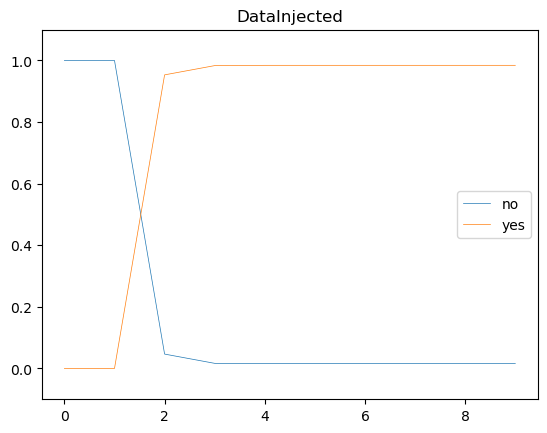

=============== End interaction trace


In [9]:
from IPython.display import display, HTML
from functools import reduce

for trace in data[:5]:
    actions = summarize_interaction.pull_actions(trace)
    display(actions)
    
    try:
        frame_beliefs = summarize_interaction.pull_frame_beliefs(trace)
        
        i_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "i_P(Aj)")
        i_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), i_PAj)))
        i_PAj = pandas.DataFrame.from_dict(i_PAj)
        print("Agent i's P(Aj)")
        display(i_PAj)

        j_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "j_P(Aj)")
        j_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), j_PAj)))
        j_PAj = pandas.DataFrame.from_dict(j_PAj)
        print("Agent j's P(Aj)")
        display(j_PAj)

        for _b_theta in frame_beliefs:
            display(_b_theta)
            _b_theta.plot(linewidth=0.5)
            plotter.ylim(-0.1, 1.1)
            plotter.show()

        for k in keys:
            beliefs = summarize_interaction.show_belief(trace, k)

            for _b in beliefs.keys():
                print(f"Showing {k} for {_b}")
                display(beliefs[_b])

                print(f"Plotting {k} for {_b}")
                beliefs[_b].plot(legend=True, title=k[0], linewidth=0.5)
                plotter.ylim(-0.1, 1.1)
                plotter.show()

        print("=============== End interaction trace")
    except Exception as e:
        print(e)